In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.interpolate import interp1d
from tqdm import tqdm
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore')

In [ ]:
import os
os.mkdir('Ground_Water_Level_Stations')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/AIS_2022_03_31.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/Ground_Water_Level_Stations.zip', 'r') as zip_ref:
    zip_ref.extractall('./Ground_Water_Level_Stations')

In [2]:
df = pd.read_csv('/content/modified_ais_data.csv')
df.head()

BaseDateTime       MMSI         IMO       LAT        LON   SOG  \
0  2022-03-31T00:00:01  671226100  IMO9221322  25.77626  -80.20320   3.2   
1  2022-03-31T00:00:06  367452810  IMO9602344  29.32824  -94.77391   2.6   
2  2022-03-31T00:00:09  366919770  IMO9253583  48.74428 -122.49504   0.0   
3  2022-03-31T00:00:00  311000966  IMO8916607  18.55833  -66.47910  17.5   
4  2022-03-31T00:00:01  219028420  IMO9411305  28.66703  -93.59339   9.5   

     COG  
0  143.7  
1  319.2  
2  210.3  
3  274.5  
4  129.4

In [ ]:
df.shape

(7167046, 17)

In [ ]:
df.isna().sum()

MMSI                      0
BaseDateTime              0
LAT                       0
LON                       0
SOG                       0
COG                       0
Heading                   0
VesselName            17201
IMO                 3368784
CallSign             833343
VesselType              817
Status              1628738
Length               438196
Width               1174077
Draft               4461321
Cargo               1624947
TransceiverClass          0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df = df[['BaseDateTime','MMSI','IMO','LAT','LON','SOG','COG']]

In [ ]:
df.isna().sum()

BaseDateTime    0
MMSI            0
IMO             0
LAT             0
LON             0
SOG             0
COG             0
dtype: int64

In [ ]:
df.shape

(1979165, 7)

In [ ]:
df.to_csv('./modified_ais_data.csv',index=False)

######################################################################################################

In [4]:
!pip install geopandas ipympl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.interpolate import interp1d
from tqdm import tqdm
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore')

In [5]:
!pip3 install geopandas
!pip3 install shapely

In [6]:
!pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.5 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import seaborn as sns
# from shapely.gemetry import Point as ShapelyPoint
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
df = pd.read_csv('./modified_ais_data.csv')

In [ ]:
df.head()

BaseDateTime       MMSI         IMO       LAT        LON   SOG  \
0  2022-03-31T00:00:01  671226100  IMO9221322  25.77626  -80.20320   3.2   
1  2022-03-31T00:00:06  367452810  IMO9602344  29.32824  -94.77391   2.6   
2  2022-03-31T00:00:09  366919770  IMO9253583  48.74428 -122.49504   0.0   
3  2022-03-31T00:00:00  311000966  IMO8916607  18.55833  -66.47910  17.5   
4  2022-03-31T00:00:01  219028420  IMO9411305  28.66703  -93.59339   9.5   

     COG  
0  143.7  
1  319.2  
2  210.3  
3  274.5  
4  129.4

<Axes: xlabel='LON', ylabel='LAT'>

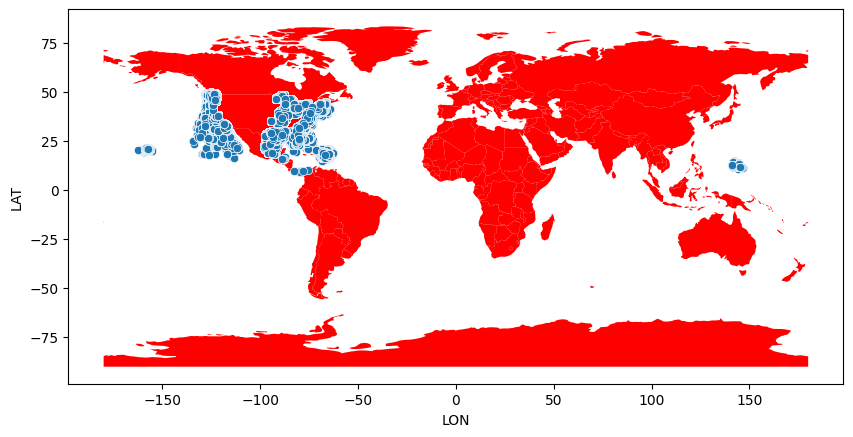

In [ ]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
ax1 = world.plot(marker='o',color='red',markersize=5,
                 figsize=(10,10))
sns.scatterplot(data=df, x='LON', y='LAT', ax=ax1)


In [ ]:
df.shape

(1979165, 7)

In [7]:
import geopandas as gpd
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from shapely.geometry import Point as ShapelyPoint
from tqdm import tqdm
from math import atan2, radians, degrees, sin, cos

def sliding_window_segmentation(data, window_size, step_size, mmsi):
    segments = []
    for start in range(0, len(data) - window_size + 1, step_size):
        window = data.iloc[start:start + window_size].copy()
        window['MMSI'] = mmsi
        segments.append(window)
    return segments

def lat_lon_range(df_file):
    min_lat, max_lat = df_file['LAT'].min(), df_file['LAT'].max()
    min_lon, max_lon = df_file['LON'].min(), df_file['LON'].max()
    min_lat, max_lat, min_lon, max_lon = (
        int(np.floor(min_lat)),
        int(np.ceil(max_lat)),
        int(np.floor(min_lon)),
        int(np.ceil(max_lon)),
    )
    return min_lat, max_lat, min_lon, max_lon

def calculate_initial_bearing(start_lat, start_lon, end_lat, end_lon):
    start_lat, start_lon, end_lat, end_lon = map(radians, [start_lat, start_lon, end_lat, end_lon])
    delta_lon = end_lon - start_lon
    x = sin(delta_lon) * cos(end_lat)
    y = cos(start_lat) * sin(end_lat) - sin(start_lat) * cos(end_lat) * cos(delta_lon)
    bearing = atan2(x, y)
    return (degrees(bearing) + 360) % 360

def geodesic_interpolation(start_lat, start_lon, end_lat, end_lon, num_points, start_time, end_time, water_mask):
    start_point = ShapelyPoint(start_lon, start_lat)
    total_distance = geodesic((start_lat, start_lon), (end_lat, end_lon)).meters
    bearing = calculate_initial_bearing(start_lat, start_lon, end_lat, end_lon)

    lats, lons, times = [], [], []
    spatial_index = water_mask.sindex
    buffered_water_mask = water_mask.buffer(0.01)

    timestamps = pd.date_range(start=start_time, end=end_time, periods=num_points)

    for frac, timestamp in zip(np.linspace(0, 1, num_points), timestamps):
        distance_to_point = total_distance * frac
        interpolated_point = geodesic(meters=distance_to_point).destination((start_lat, start_lon), bearing)
        lat, lon = interpolated_point.latitude, interpolated_point.longitude

        point = ShapelyPoint(lon, lat)
        possible_matches_index = list(spatial_index.intersection(point.bounds))
        possible_matches = buffered_water_mask.iloc[possible_matches_index]

        if not possible_matches.contains(point).any():
            print(f"Skipping interpolated point on land or near boundary: ({lat}, {lon})")
            continue

        lats.append(lat)
        lons.append(lon)
        times.append(timestamp)

    return lats, lons, times

def prepare_ais_data_with_geodesic_interpolation(
    data, bounding_box, window_size, step_size, water_mask, min_resample_interval=3600
):
    min_lat, max_lat, min_lon, max_lon = bounding_box

    filtered_data = data[
        (data['LAT'] >= min_lat) & (data['LAT'] <= max_lat) &
        (data['LON'] >= min_lon) & (data['LON'] <= max_lon)
    ]

    grouped = filtered_data.groupby('MMSI')
    segments = []
    segment_id = 0

    for mmsi, group in tqdm(grouped, desc="Processing MMSI", unit="MMSI"):
        group = group.sort_values(by='BaseDateTime')
        group['BaseDateTime'] = pd.to_datetime(group['BaseDateTime'])

        resampled_traj = []

        for i in range(len(group) - 1):
            start_row = group.iloc[i]
            end_row = group.iloc[i + 1]

            time_diff = (end_row['BaseDateTime'] - start_row['BaseDateTime']).total_seconds()

            if time_diff < min_resample_interval:
                print(f"Skipping interpolation for gap < {min_resample_interval} minutes between {start_row['BaseDateTime']} and {end_row['BaseDateTime']}")
                resampled_traj.append((start_row['BaseDateTime'], start_row['LAT'], start_row['LON'], start_row['SOG'], start_row['COG']))
                continue

            num_points = int(time_diff / min_resample_interval) + 1
            print(f"Performing interpolation for gap >= {min_resample_interval} minutes between {start_row['BaseDateTime']} and {end_row['BaseDateTime']} with {num_points} points")

            lats, lons, times = geodesic_interpolation(
                start_row['LAT'], start_row['LON'],
                end_row['LAT'], end_row['LON'],
                num_points, start_row['BaseDateTime'], end_row['BaseDateTime'], water_mask
            )

            sog_interp = np.linspace(start_row['SOG'], end_row['SOG'], len(lats))
            cog_interp = np.linspace(start_row['COG'], end_row['COG'], len(lats))

            resampled_traj.extend(zip(times, lats, lons, sog_interp, cog_interp))

        resampled_traj.append((end_row['BaseDateTime'], end_row['LAT'], end_row['LON'], end_row['SOG'], end_row['COG']))
        resampled_df = pd.DataFrame(resampled_traj, columns=['BaseDateTime', 'LAT', 'LON', 'SOG', 'COG'])

        trajectory_segments = sliding_window_segmentation(resampled_df, window_size, step_size, mmsi)

        for segment in trajectory_segments:
            segment['SegmentID'] = segment_id
            segments.append(segment)
            segment_id += 1

        # Append resampled data to the original group
        group = pd.concat([group, resampled_df]).sort_values(by='BaseDateTime')

    combined_df = pd.concat(segments, ignore_index=True)
    return combined_df

# Example usage
if __name__ == "__main__":
    df = df[:30000]
    # water_mask = gpd.read_file("/path/to/world_shapefile.shp")
    water_url = "https://naciscdn.org/naturalearth/110m/physical/ne_110m_geography_marine_polys.zip"
    water_mask = gpd.read_file(water_url)

    min_lat, max_lat, min_lon, max_lon = lat_lon_range(df)
    bounding_box = (min_lat, max_lat, min_lon, max_lon)

    window_size = 10
    step_size = 5

    segmented_trajectories_df = prepare_ais_data_with_geodesic_interpolation(
        df, bounding_box, window_size, step_size, water_mask, min_resample_interval=900
    )

    segmented_trajectories_df.to_csv("segmented_trajectories.csv", index=False)


Processing MMSI:   1%|          | 11/2089 [00:00<00:21, 94.84MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:32 and 2022-03-31 00:05:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:35 and 2022-03-31 00:08:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:34 and 2022-03-31 00:11:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:31 and 2022-03-31 00:14:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:33 and 2022-03-31 00:17:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:33 and 2022-03-31 00:20:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:32 and 2022-03-31 00:23:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:32 and 2022-03-31 00:29:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:29:36 and 2022-03-31 00:32:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:17 and 2022-03-31 00:01:18
Skipping interpolation for gap

Processing MMSI:   2%|▏         | 34/2089 [00:00<00:31, 65.20MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:06 and 2022-03-31 00:19:05
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:18 and 2022-03-31 00:03:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:16 and 2022-03-31 00:06:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:16 and 2022-03-31 00:09:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:19 and 2022-03-31 00:12:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:18 and 2022-03-31 00:15:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:19 and 2022-03-31 00:18:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:18 and 2022-03-31 00:21:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:21:18 and 2022-03-31 00:24:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:18 and 2022-03-31 00:27:19
Skipping interpolation for gap

Processing MMSI:   3%|▎         | 61/2089 [00:00<00:21, 93.98MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:00 and 2022-03-31 00:08:01
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:01 and 2022-03-31 00:10:59
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:59 and 2022-03-31 00:14:02
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:02 and 2022-03-31 00:19:58
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:58 and 2022-03-31 00:22:59
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:59 and 2022-03-31 00:26:01
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:01 and 2022-03-31 00:28:59
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:28:59 and 2022-03-31 00:32:02
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:24 and 2022-03-31 00:01:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:30 and 2022-03-31 00:02:35
Skipping interpolation for gap

Processing MMSI:   4%|▍         | 87/2089 [00:00<00:18, 110.68MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:10 and 2022-03-31 00:02:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:20 and 2022-03-31 00:03:29
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:29 and 2022-03-31 00:04:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:39 and 2022-03-31 00:05:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:51 and 2022-03-31 00:07:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:00 and 2022-03-31 00:08:09
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:09 and 2022-03-31 00:09:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:21 and 2022-03-31 00:10:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:31 and 2022-03-31 00:11:41
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:41 and 2022-03-31 00:12:50
Skipping interpolation for gap

Processing MMSI:   6%|▌         | 115/2089 [00:01<00:16, 122.03MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:47 and 2022-03-31 00:23:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:16 and 2022-03-31 00:25:37
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:37 and 2022-03-31 00:28:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:28:16 and 2022-03-31 00:29:46
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:38 and 2022-03-31 00:08:29
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:29 and 2022-03-31 00:14:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:34 and 2022-03-31 00:20:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:33 and 2022-03-31 00:23:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:35 and 2022-03-31 00:26:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:28 and 2022-03-31 00:04:26
Skipping interpolation for gap

Processing MMSI:   7%|▋         | 140/2089 [00:01<00:16, 114.71MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:06 and 2022-03-31 00:04:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:06 and 2022-03-31 00:07:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:06 and 2022-03-31 00:10:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:06 and 2022-03-31 00:13:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:06 and 2022-03-31 00:16:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:06 and 2022-03-31 00:19:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:06 and 2022-03-31 00:22:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:06 and 2022-03-31 00:25:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:06 and 2022-03-31 00:28:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:25 and 2022-03-31 00:05:29
Skipping interpolation for gap

Processing MMSI:   7%|▋         | 152/2089 [00:01<00:18, 105.12MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:30 and 2022-03-31 00:20:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:31 and 2022-03-31 00:21:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:21:36 and 2022-03-31 00:22:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:43 and 2022-03-31 00:23:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:49 and 2022-03-31 00:25:01
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:01 and 2022-03-31 00:26:07
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:07 and 2022-03-31 00:27:12
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:27:12 and 2022-03-31 00:29:24
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:29:24 and 2022-03-31 00:30:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:45 and 2022-03-31 00:04:45
Skipping interpolation for gap

Processing MMSI:   8%|▊         | 177/2089 [00:01<00:16, 113.73MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:16 and 2022-03-31 00:06:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:18 and 2022-03-31 00:09:17
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:17 and 2022-03-31 00:12:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:18 and 2022-03-31 00:15:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:16 and 2022-03-31 00:18:17
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:17 and 2022-03-31 00:21:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:21:16 and 2022-03-31 00:24:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:16 and 2022-03-31 00:27:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:44 and 2022-03-31 00:08:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:44 and 2022-03-31 00:11:44
Skipping interpolation for gap

Processing MMSI:   9%|▉         | 189/2089 [00:01<00:22, 83.61MMSI/s] 

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:39 and 2022-03-31 00:06:37
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:37 and 2022-03-31 00:09:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:38 and 2022-03-31 00:12:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:38 and 2022-03-31 00:15:37
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:37 and 2022-03-31 00:18:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:39 and 2022-03-31 00:27:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:27:36 and 2022-03-31 00:30:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:15 and 2022-03-31 00:04:14
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:14 and 2022-03-31 00:07:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:15 and 2022-03-31 00:10:15
Skipping interpolation for gap

Processing MMSI:  11%|█         | 221/2089 [00:02<00:19, 93.79MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:01 and 2022-03-31 00:01:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:11 and 2022-03-31 00:02:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:21 and 2022-03-31 00:03:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:31 and 2022-03-31 00:04:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:42 and 2022-03-31 00:05:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:51 and 2022-03-31 00:07:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:00 and 2022-03-31 00:08:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:11 and 2022-03-31 00:09:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:21 and 2022-03-31 00:10:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:31 and 2022-03-31 00:11:41
Skipping interpolation for gap

Processing MMSI:  12%|█▏        | 242/2089 [00:02<00:18, 97.74MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:20 and 2022-03-31 00:11:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:19 and 2022-03-31 00:14:14
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:14 and 2022-03-31 00:17:17
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:17 and 2022-03-31 00:20:14
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:14 and 2022-03-31 00:23:14
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:14 and 2022-03-31 00:32:17
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:29 and 2022-03-31 00:10:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:31 and 2022-03-31 00:13:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:31 and 2022-03-31 00:22:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:07 and 2022-03-31 00:01:13
Skipping interpolation for gap

Processing MMSI:  13%|█▎        | 266/2089 [00:02<00:19, 93.54MMSI/s]

Skipping interpolated point on land or near boundary: (34.19815, -77.95572)
Skipping interpolated point on land or near boundary: (34.19815, -77.95571)
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:49 and 2022-03-31 00:03:50
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:50 and 2022-03-31 00:06:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:49 and 2022-03-31 00:09:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:49 and 2022-03-31 00:12:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:49 and 2022-03-31 00:15:50
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:50 and 2022-03-31 00:18:50
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:50 and 2022-03-31 00:24:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:49 and 2022-03-31 00:27:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:04

Processing MMSI:  14%|█▎        | 286/2089 [00:02<00:20, 89.65MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:49 and 2022-03-31 00:16:09
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:09 and 2022-03-31 00:17:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:19 and 2022-03-31 00:19:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:39 and 2022-03-31 00:20:50
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:50 and 2022-03-31 00:23:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:19 and 2022-03-31 00:24:28
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:28 and 2022-03-31 00:26:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:49 and 2022-03-31 00:28:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:28:00 and 2022-03-31 00:29:09
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:29:09 and 2022-03-31 00:31:29
Skipping interpolation for gap

Processing MMSI:  15%|█▍        | 306/2089 [00:03<00:19, 90.03MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:04 and 2022-03-31 00:01:14
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:14 and 2022-03-31 00:02:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:25 and 2022-03-31 00:03:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:33 and 2022-03-31 00:04:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:44 and 2022-03-31 00:05:54
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:54 and 2022-03-31 00:07:05
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:05 and 2022-03-31 00:08:14
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:14 and 2022-03-31 00:09:24
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:24 and 2022-03-31 00:10:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:34 and 2022-03-31 00:11:35
Skipping interpolation for gap

Processing MMSI:  16%|█▌        | 328/2089 [00:03<00:18, 96.71MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:25 and 2022-03-31 00:01:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:33 and 2022-03-31 00:02:45
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:45 and 2022-03-31 00:03:55
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:55 and 2022-03-31 00:05:04
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:04 and 2022-03-31 00:06:14
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:14 and 2022-03-31 00:07:24
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:24 and 2022-03-31 00:08:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:25 and 2022-03-31 00:09:45
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:45 and 2022-03-31 00:10:54
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:54 and 2022-03-31 00:12:05
Skipping interpolation for gap

Processing MMSI:  16%|█▌        | 338/2089 [00:03<00:19, 89.28MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:45 and 2022-03-31 00:13:55
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:55 and 2022-03-31 00:15:05
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:05 and 2022-03-31 00:16:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:15 and 2022-03-31 00:17:24
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:24 and 2022-03-31 00:18:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:35 and 2022-03-31 00:19:45
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:45 and 2022-03-31 00:20:55
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:55 and 2022-03-31 00:22:05
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:05 and 2022-03-31 00:23:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:15 and 2022-03-31 00:24:23
Skipping interpolation for gap

Processing MMSI:  17%|█▋        | 357/2089 [00:03<00:19, 86.86MMSI/s]


Skipping interpolation for gap < 900 minutes between 2022-03-31 00:29:44 and 2022-03-31 00:31:58
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:07 and 2022-03-31 00:01:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:16 and 2022-03-31 00:02:26
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:26 and 2022-03-31 00:03:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:36 and 2022-03-31 00:04:47
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:47 and 2022-03-31 00:05:56
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:56 and 2022-03-31 00:07:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:06 and 2022-03-31 00:08:13
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:13 and 2022-03-31 00:09:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:20 and 2022-03-31 00:10:27
Skipping interpolation for ga

Processing MMSI:  18%|█▊        | 375/2089 [00:04<00:21, 80.32MMSI/s]


Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:07 and 2022-03-31 00:02:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:27 and 2022-03-31 00:03:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:30 and 2022-03-31 00:04:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:33 and 2022-03-31 00:05:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:34 and 2022-03-31 00:06:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:44 and 2022-03-31 00:07:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:49 and 2022-03-31 00:09:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:00 and 2022-03-31 00:10:04
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:04 and 2022-03-31 00:11:10
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:10 and 2022-03-31 00:12:13
Skipping interpolation for ga

Processing MMSI:  19%|█▉        | 394/2089 [00:04<00:20, 81.86MMSI/s]


Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:35 and 2022-03-31 00:18:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:43 and 2022-03-31 00:19:54
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:13 and 2022-03-31 00:01:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:43 and 2022-03-31 00:03:01
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:01 and 2022-03-31 00:04:03
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:03 and 2022-03-31 00:05:13
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:13 and 2022-03-31 00:06:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:32 and 2022-03-31 00:07:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:43 and 2022-03-31 00:08:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:52 and 2022-03-31 00:10:03
Skipping interpolation for ga

Processing MMSI:  20%|█▉        | 411/2089 [00:04<00:23, 72.75MMSI/s]

Skipping interpolated point on land or near boundary: (49.1694, -123.93272)
Skipping interpolated point on land or near boundary: (49.16938998181127, -123.93273997881758)
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:31 and 2022-03-31 00:05:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:32 and 2022-03-31 00:08:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:35 and 2022-03-31 00:11:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:32 and 2022-03-31 00:17:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:33 and 2022-03-31 00:20:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:35 and 2022-03-31 00:23:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:32 and 2022-03-31 00:26:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:36 and 2022-03-31 00:29:34
Skipping interpolation for gap < 900 minutes between 

Processing MMSI:  21%|██        | 433/2089 [00:04<00:18, 88.63MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:09 and 2022-03-31 00:01:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:19 and 2022-03-31 00:02:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:30 and 2022-03-31 00:03:40
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:40 and 2022-03-31 00:04:50
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:50 and 2022-03-31 00:05:59
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:59 and 2022-03-31 00:07:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:00 and 2022-03-31 00:08:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:11 and 2022-03-31 00:09:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:20 and 2022-03-31 00:10:40
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:40 and 2022-03-31 00:11:50
Skipping interpolation for gap

Processing MMSI:  22%|██▏       | 464/2089 [00:04<00:13, 118.70MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:19 and 2022-03-31 00:04:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:19 and 2022-03-31 00:07:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:19 and 2022-03-31 00:10:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:19 and 2022-03-31 00:13:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:19 and 2022-03-31 00:19:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:19 and 2022-03-31 00:22:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:19 and 2022-03-31 00:25:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:19 and 2022-03-31 00:28:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:28:19 and 2022-03-31 00:31:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:43 and 2022-03-31 00:04:43
Skipping interpolation for gap

Processing MMSI:  24%|██▎       | 493/2089 [00:05<00:12, 126.83MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:27 and 2022-03-31 00:03:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:36 and 2022-03-31 00:04:47
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:47 and 2022-03-31 00:05:48
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:48 and 2022-03-31 00:06:57
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:57 and 2022-03-31 00:08:07
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:07 and 2022-03-31 00:09:08
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:08 and 2022-03-31 00:10:17
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:17 and 2022-03-31 00:11:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:27 and 2022-03-31 00:12:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:36 and 2022-03-31 00:13:47
Skipping interpolation for gap

Processing MMSI:  25%|██▍       | 522/2089 [00:05<00:11, 132.40MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:58 and 2022-03-31 00:07:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:00 and 2022-03-31 00:09:59
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:59 and 2022-03-31 00:13:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:00 and 2022-03-31 00:15:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:51 and 2022-03-31 00:18:50
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:50 and 2022-03-31 00:21:55
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:21:55 and 2022-03-31 00:27:54
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:27:54 and 2022-03-31 00:30:50
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:23 and 2022-03-31 00:05:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:27 and 2022-03-31 00:08:22
Skipping interpolation for gap

Processing MMSI:  26%|██▋       | 551/2089 [00:05<00:11, 137.77MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:27:17 and 2022-03-31 00:30:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:00 and 2022-03-31 00:01:10
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:10 and 2022-03-31 00:02:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:22 and 2022-03-31 00:03:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:31 and 2022-03-31 00:04:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:38 and 2022-03-31 00:06:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:00 and 2022-03-31 00:07:10
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:10 and 2022-03-31 00:08:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:31 and 2022-03-31 00:09:40
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:40 and 2022-03-31 00:11:01
Skipping interpolation for gap

Processing MMSI:  27%|██▋       | 565/2089 [00:05<00:16, 91.06MMSI/s] 

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:35 and 2022-03-31 00:04:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:35 and 2022-03-31 00:07:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:35 and 2022-03-31 00:10:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:35 and 2022-03-31 00:13:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:35 and 2022-03-31 00:16:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:35 and 2022-03-31 00:25:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:35 and 2022-03-31 00:31:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:09 and 2022-03-31 00:01:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:18 and 2022-03-31 00:02:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:19 and 2022-03-31 00:03:29
Skipping interpolation for gap

Processing MMSI:  28%|██▊       | 591/2089 [00:06<00:14, 103.63MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:05 and 2022-03-31 00:12:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:34 and 2022-03-31 00:15:05
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:35 and 2022-03-31 00:22:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:33 and 2022-03-31 00:25:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:43 and 2022-03-31 00:03:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:42 and 2022-03-31 00:06:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:43 and 2022-03-31 00:09:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:43 and 2022-03-31 00:12:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:43 and 2022-03-31 00:15:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:43 and 2022-03-31 00:18:44
Skipping interpolation for gap

Processing MMSI:  29%|██▉       | 603/2089 [00:06<00:17, 85.19MMSI/s] 

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:01 and 2022-03-31 00:01:10
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:10 and 2022-03-31 00:02:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:20 and 2022-03-31 00:03:26
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:26 and 2022-03-31 00:04:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:31 and 2022-03-31 00:05:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:39 and 2022-03-31 00:06:40
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:40 and 2022-03-31 00:07:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:51 and 2022-03-31 00:09:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:00 and 2022-03-31 00:10:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:11 and 2022-03-31 00:11:20
Skipping interpolation for gap

Processing MMSI:  30%|███       | 634/2089 [00:06<00:13, 111.71MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:06 and 2022-03-31 00:01:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:27 and 2022-03-31 00:02:37
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:37 and 2022-03-31 00:03:56
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:56 and 2022-03-31 00:05:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:06 and 2022-03-31 00:06:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:16 and 2022-03-31 00:07:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:27 and 2022-03-31 00:08:46
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:46 and 2022-03-31 00:09:56
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:56 and 2022-03-31 00:11:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:06 and 2022-03-31 00:12:27
Skipping interpolation for gap

Processing MMSI:  32%|███▏      | 661/2089 [00:06<00:12, 118.32MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:59 and 2022-03-31 00:10:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:00 and 2022-03-31 00:12:57
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:57 and 2022-03-31 00:15:59
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:59 and 2022-03-31 00:22:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:00 and 2022-03-31 00:27:57
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:04 and 2022-03-31 00:01:14
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:14 and 2022-03-31 00:02:24
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:24 and 2022-03-31 00:03:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:33 and 2022-03-31 00:04:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:44 and 2022-03-31 00:05:54
Skipping interpolation for gap

Processing MMSI:  32%|███▏      | 674/2089 [00:06<00:14, 97.89MMSI/s] 

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:10 and 2022-03-31 00:01:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:21 and 2022-03-31 00:02:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:52 and 2022-03-31 00:04:01
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:01 and 2022-03-31 00:05:10
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:10 and 2022-03-31 00:06:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:21 and 2022-03-31 00:07:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:32 and 2022-03-31 00:08:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:42 and 2022-03-31 00:09:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:51 and 2022-03-31 00:11:01
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:01 and 2022-03-31 00:12:11
Skipping interpolation for gap

Processing MMSI:  33%|███▎      | 698/2089 [00:07<00:14, 99.24MMSI/s] 

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:20 and 2022-03-31 00:14:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:20 and 2022-03-31 00:17:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:20 and 2022-03-31 00:20:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:21 and 2022-03-31 00:23:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:20 and 2022-03-31 00:26:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:20 and 2022-03-31 00:16:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:16 and 2022-03-31 00:25:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:15 and 2022-03-31 00:31:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:59 and 2022-03-31 00:08:59
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:59 and 2022-03-31 00:11:59
Skipping interpolation for gap

Processing MMSI:  34%|███▍      | 720/2089 [00:07<00:13, 103.32MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:12 and 2022-03-31 00:02:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:22 and 2022-03-31 00:04:02
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:02 and 2022-03-31 00:05:03
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:03 and 2022-03-31 00:06:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:32 and 2022-03-31 00:08:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:32 and 2022-03-31 00:10:03
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:03 and 2022-03-31 00:11:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:33 and 2022-03-31 00:12:41
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:41 and 2022-03-31 00:14:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:33 and 2022-03-31 00:15:41
Skipping interpolation for gap

Processing MMSI:  35%|███▍      | 731/2089 [00:07<00:13, 103.62MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:15 and 2022-03-31 00:03:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:25 and 2022-03-31 00:04:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:35 and 2022-03-31 00:05:46
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:46 and 2022-03-31 00:06:55
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:55 and 2022-03-31 00:08:05
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:05 and 2022-03-31 00:09:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:15 and 2022-03-31 00:10:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:25 and 2022-03-31 00:11:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:35 and 2022-03-31 00:12:45
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:45 and 2022-03-31 00:13:54
Skipping interpolation for gap

Processing MMSI:  36%|███▌      | 757/2089 [00:07<00:12, 105.97MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:07 and 2022-03-31 00:01:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:18 and 2022-03-31 00:02:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:27 and 2022-03-31 00:03:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:36 and 2022-03-31 00:04:48
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:48 and 2022-03-31 00:05:57
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:57 and 2022-03-31 00:06:58
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:58 and 2022-03-31 00:08:07
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:07 and 2022-03-31 00:09:17
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:17 and 2022-03-31 00:10:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:27 and 2022-03-31 00:11:38
Skipping interpolation for gap

Processing MMSI:  37%|███▋      | 779/2089 [00:07<00:13, 96.32MMSI/s] 

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:05 and 2022-03-31 00:01:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:15 and 2022-03-31 00:02:24
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:24 and 2022-03-31 00:03:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:34 and 2022-03-31 00:04:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:44 and 2022-03-31 00:05:55
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:55 and 2022-03-31 00:07:05
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:05 and 2022-03-31 00:08:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:15 and 2022-03-31 00:09:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:25 and 2022-03-31 00:10:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:35 and 2022-03-31 00:11:45
Skipping interpolation for gap

Processing MMSI:  38%|███▊      | 789/2089 [00:08<00:16, 76.85MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:39 and 2022-03-31 00:05:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:39 and 2022-03-31 00:08:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:39 and 2022-03-31 00:11:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:38 and 2022-03-31 00:14:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:39 and 2022-03-31 00:17:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:39 and 2022-03-31 00:20:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:38 and 2022-03-31 00:23:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:39 and 2022-03-31 00:26:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:38 and 2022-03-31 00:29:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:01 and 2022-03-31 00:01:11
Skipping interpolation for gap

Processing MMSI:  39%|███▊      | 808/2089 [00:08<00:16, 79.71MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:23 and 2022-03-31 00:04:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:43 and 2022-03-31 00:05:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:52 and 2022-03-31 00:07:02
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:02 and 2022-03-31 00:08:13
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:13 and 2022-03-31 00:09:23
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:23 and 2022-03-31 00:10:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:33 and 2022-03-31 00:11:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:42 and 2022-03-31 00:12:53
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:53 and 2022-03-31 00:14:02
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:02 and 2022-03-31 00:15:13
Skipping interpolation for gap

Processing MMSI:  39%|███▉      | 817/2089 [00:08<00:15, 81.84MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:22 and 2022-03-31 00:13:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:33 and 2022-03-31 00:14:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:42 and 2022-03-31 00:15:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:52 and 2022-03-31 00:17:12
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:12 and 2022-03-31 00:18:23
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:23 and 2022-03-31 00:20:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:43 and 2022-03-31 00:22:02
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:02 and 2022-03-31 00:23:13
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:13 and 2022-03-31 00:24:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:22 and 2022-03-31 00:25:33
Skipping interpolation for gap

Processing MMSI:  40%|███▉      | 835/2089 [00:08<00:15, 81.18MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:42 and 2022-03-31 00:23:03
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:03 and 2022-03-31 00:24:12
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:12 and 2022-03-31 00:25:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:22 and 2022-03-31 00:26:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:32 and 2022-03-31 00:28:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:28:52 and 2022-03-31 00:31:13
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:39 and 2022-03-31 00:01:48
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:48 and 2022-03-31 00:02:57
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:57 and 2022-03-31 00:04:08
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:08 and 2022-03-31 00:05:17
Skipping interpolation for gap

Processing MMSI:  41%|████      | 855/2089 [00:08<00:13, 88.34MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:30 and 2022-03-31 00:03:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:39 and 2022-03-31 00:04:50
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:50 and 2022-03-31 00:06:09
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:09 and 2022-03-31 00:07:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:30 and 2022-03-31 00:08:48
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:48 and 2022-03-31 00:10:09
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:09 and 2022-03-31 00:11:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:30 and 2022-03-31 00:12:50
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:50 and 2022-03-31 00:14:09
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:09 and 2022-03-31 00:15:29
Skipping interpolation for gap

Processing MMSI:  41%|████▏     | 864/2089 [00:09<00:17, 72.00MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:28 and 2022-03-31 00:09:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:34 and 2022-03-31 00:12:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:32 and 2022-03-31 00:15:28
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:28 and 2022-03-31 00:18:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:31 and 2022-03-31 00:21:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:21:33 and 2022-03-31 00:24:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:33 and 2022-03-31 00:27:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:27:33 and 2022-03-31 00:30:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:30:34 and 2022-03-31 00:33:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:03 and 2022-03-31 00:01:22
Skipping interpolation for gap

Processing MMSI:  42%|████▏     | 883/2089 [00:09<00:15, 78.56MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:28:45 and 2022-03-31 00:29:53
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:29:53 and 2022-03-31 00:31:04
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:31:04 and 2022-03-31 00:32:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:01 and 2022-03-31 00:01:10
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:10 and 2022-03-31 00:02:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:21 and 2022-03-31 00:03:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:31 and 2022-03-31 00:04:41
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:41 and 2022-03-31 00:05:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:51 and 2022-03-31 00:07:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:00 and 2022-03-31 00:08:01
Skipping interpolation for gap

Processing MMSI:  43%|████▎     | 892/2089 [00:09<00:14, 80.55MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:29:34 and 2022-03-31 00:30:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:30:44 and 2022-03-31 00:31:54
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:01 and 2022-03-31 00:01:03
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:03 and 2022-03-31 00:02:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:06 and 2022-03-31 00:03:07
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:07 and 2022-03-31 00:04:09
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:09 and 2022-03-31 00:05:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:11 and 2022-03-31 00:06:17
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:17 and 2022-03-31 00:07:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:27 and 2022-03-31 00:08:47
Skipping interpolation for gap

Processing MMSI:  44%|████▎     | 909/2089 [00:09<00:17, 68.15MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:06 and 2022-03-31 00:01:17
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:17 and 2022-03-31 00:02:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:27 and 2022-03-31 00:03:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:36 and 2022-03-31 00:04:45
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:45 and 2022-03-31 00:05:47
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:47 and 2022-03-31 00:06:56
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:56 and 2022-03-31 00:08:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:06 and 2022-03-31 00:09:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:15 and 2022-03-31 00:10:26
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:26 and 2022-03-31 00:11:36
Skipping interpolation for gap

Processing MMSI:  44%|████▍     | 926/2089 [00:09<00:15, 73.34MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:01 and 2022-03-31 00:01:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:11 and 2022-03-31 00:02:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:21 and 2022-03-31 00:03:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:30 and 2022-03-31 00:04:41
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:41 and 2022-03-31 00:06:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:00 and 2022-03-31 00:07:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:11 and 2022-03-31 00:08:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:30 and 2022-03-31 00:09:50
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:50 and 2022-03-31 00:11:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:00 and 2022-03-31 00:12:01
Skipping interpolation for gap

Processing MMSI:  45%|████▌     | 945/2089 [00:10<00:13, 82.44MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:57 and 2022-03-31 00:24:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:06 and 2022-03-31 00:25:07
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:07 and 2022-03-31 00:29:47
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:14 and 2022-03-31 00:08:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:11 and 2022-03-31 00:11:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:15 and 2022-03-31 00:14:10
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:10 and 2022-03-31 00:20:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:11 and 2022-03-31 00:26:10
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:02 and 2022-03-31 00:01:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:22 and 2022-03-31 00:02:32
Skipping interpolation for gap

Processing MMSI:  46%|████▌     | 965/2089 [00:10<00:12, 86.77MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:07 and 2022-03-31 00:01:17
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:17 and 2022-03-31 00:02:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:18 and 2022-03-31 00:03:28
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:28 and 2022-03-31 00:04:37
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:37 and 2022-03-31 00:05:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:49 and 2022-03-31 00:06:58
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:58 and 2022-03-31 00:08:07
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:07 and 2022-03-31 00:09:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:18 and 2022-03-31 00:10:37
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:37 and 2022-03-31 00:11:38
Skipping interpolation for gap

Processing MMSI:  47%|████▋     | 984/2089 [00:10<00:12, 87.48MMSI/s]


Skipping interpolation for gap < 900 minutes between 2022-03-31 00:30:46 and 2022-03-31 00:34:07
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:05 and 2022-03-31 00:01:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:06 and 2022-03-31 00:02:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:15 and 2022-03-31 00:03:24
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:24 and 2022-03-31 00:04:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:35 and 2022-03-31 00:05:45
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:45 and 2022-03-31 00:06:54
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:54 and 2022-03-31 00:08:04
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:04 and 2022-03-31 00:09:14
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:14 and 2022-03-31 00:10:24
Skipping interpolation for ga

Processing MMSI:  48%|████▊     | 1009/2089 [00:10<00:10, 101.23MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:29:31 and 2022-03-31 00:30:41
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:12 and 2022-03-31 00:12:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:32 and 2022-03-31 00:13:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:42 and 2022-03-31 00:15:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:42 and 2022-03-31 00:18:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:42 and 2022-03-31 00:24:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:42 and 2022-03-31 00:27:12
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:20 and 2022-03-31 00:02:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:21 and 2022-03-31 00:03:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:30 and 2022-03-31 00:04:40
Skipping interpolation for gap

Processing MMSI:  49%|████▉     | 1020/2089 [00:10<00:12, 84.08MMSI/s] 

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:11 and 2022-03-31 00:13:12
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:12 and 2022-03-31 00:16:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:11 and 2022-03-31 00:22:12
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:12 and 2022-03-31 00:25:12
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:12 and 2022-03-31 00:28:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:28:11 and 2022-03-31 00:31:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:44 and 2022-03-31 00:03:55
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:55 and 2022-03-31 00:07:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:44 and 2022-03-31 00:09:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:15 and 2022-03-31 00:19:24
Skipping interpolation for gap

Processing MMSI:  50%|████▉     | 1038/2089 [00:11<00:12, 84.78MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:38 and 2022-03-31 00:04:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:39 and 2022-03-31 00:07:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:38 and 2022-03-31 00:13:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:39 and 2022-03-31 00:16:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:38 and 2022-03-31 00:19:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:39 and 2022-03-31 00:22:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:39 and 2022-03-31 00:25:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:38 and 2022-03-31 00:31:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:01 and 2022-03-31 00:01:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:11 and 2022-03-31 00:02:22
Skipping interpolation for gap

Processing MMSI:  51%|█████     | 1057/2089 [00:11<00:12, 84.28MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:31 and 2022-03-31 00:04:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:30 and 2022-03-31 00:07:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:30 and 2022-03-31 00:10:29
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:29 and 2022-03-31 00:13:29
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:29 and 2022-03-31 00:16:28
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:28 and 2022-03-31 00:19:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:30 and 2022-03-31 00:25:29
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:29 and 2022-03-31 00:28:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:28:30 and 2022-03-31 00:31:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:07 and 2022-03-31 00:01:15
Skipping interpolation for gap

Processing MMSI:  52%|█████▏    | 1076/2089 [00:11<00:12, 78.69MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:28:33 and 2022-03-31 00:29:53
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:03 and 2022-03-31 00:01:12
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:12 and 2022-03-31 00:02:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:22 and 2022-03-31 00:03:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:33 and 2022-03-31 00:04:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:43 and 2022-03-31 00:05:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:44 and 2022-03-31 00:06:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:52 and 2022-03-31 00:08:02
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:02 and 2022-03-31 00:09:13
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:13 and 2022-03-31 00:10:23
Skipping interpolation for gap

Processing MMSI:  52%|█████▏    | 1085/2089 [00:11<00:16, 59.25MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:02 and 2022-03-31 00:01:13
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:13 and 2022-03-31 00:02:23
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:23 and 2022-03-31 00:03:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:32 and 2022-03-31 00:04:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:33 and 2022-03-31 00:05:41
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:41 and 2022-03-31 00:06:53
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:53 and 2022-03-31 00:08:01
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:01 and 2022-03-31 00:09:03
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:03 and 2022-03-31 00:10:12
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:12 and 2022-03-31 00:11:22
Skipping interpolation for gap

Processing MMSI:  53%|█████▎    | 1104/2089 [00:12<00:13, 72.99MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:47 and 2022-03-31 00:04:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:49 and 2022-03-31 00:07:50
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:50 and 2022-03-31 00:13:50
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:50 and 2022-03-31 00:16:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:51 and 2022-03-31 00:19:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:51 and 2022-03-31 00:22:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:52 and 2022-03-31 00:25:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:49 and 2022-03-31 00:28:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:28:51 and 2022-03-31 00:31:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:22 and 2022-03-31 00:04:23
Skipping interpolation for gap

Processing MMSI:  54%|█████▍    | 1123/2089 [00:12<00:13, 69.16MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:07 and 2022-03-31 00:07:03
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:03 and 2022-03-31 00:10:07
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:07 and 2022-03-31 00:13:05
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:05 and 2022-03-31 00:16:03
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:03 and 2022-03-31 00:19:07
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:07 and 2022-03-31 00:22:03
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:03 and 2022-03-31 00:25:03
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:03 and 2022-03-31 00:28:04
Performing interpolation for gap >= 900 minutes between 2022-03-31 00:01:46 and 2022-03-31 00:19:43 with 2 points
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:43 and 2022-03-31 00:26:49
Skipping inte

Processing MMSI:  55%|█████▍    | 1143/2089 [00:12<00:11, 80.58MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:07 and 2022-03-31 00:03:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:27 and 2022-03-31 00:06:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:16 and 2022-03-31 00:16:28
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:04 and 2022-03-31 00:01:14
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:14 and 2022-03-31 00:02:24
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:24 and 2022-03-31 00:03:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:34 and 2022-03-31 00:04:45
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:45 and 2022-03-31 00:05:54
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:54 and 2022-03-31 00:07:04
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:04 and 2022-03-31 00:08:15
Skipping interpolation for gap

Processing MMSI:  56%|█████▌    | 1168/2089 [00:12<00:09, 93.31MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:02 and 2022-03-31 00:08:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:11 and 2022-03-31 00:09:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:21 and 2022-03-31 00:10:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:30 and 2022-03-31 00:11:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:42 and 2022-03-31 00:12:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:51 and 2022-03-31 00:14:01
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:01 and 2022-03-31 00:15:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:11 and 2022-03-31 00:16:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:20 and 2022-03-31 00:17:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:21 and 2022-03-31 00:18:32
Skipping interpolation for gap

Processing MMSI:  56%|█████▋    | 1178/2089 [00:13<00:13, 69.23MMSI/s]

Skipping interpolated point on land or near boundary: (29.13939, -90.21269)
Skipping interpolated point on land or near boundary: (29.139440134739512, -90.21263014605258)
Performing interpolation for gap >= 900 minutes between 2022-03-31 00:07:11 and 2022-03-31 00:26:31 with 2 points
Skipping interpolated point on land or near boundary: (29.13203, -90.20227)
Skipping interpolated point on land or near boundary: (29.13206, -90.20227)
Performing interpolation for gap >= 900 minutes between 2022-03-31 00:03:04 and 2022-03-31 00:19:04 with 2 points
Skipping interpolated point on land or near boundary: (29.144389999999998, -90.20732)
Skipping interpolated point on land or near boundary: (29.144389999999998, -90.20731)
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:11 and 2022-03-31 00:01:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:31 and 2022-03-31 00:03:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:11 and 2022-0

Processing MMSI:  57%|█████▋    | 1198/2089 [00:13<00:13, 67.84MMSI/s]


Skipping interpolation for gap < 900 minutes between 2022-03-31 00:28:11 and 2022-03-31 00:32:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:38 and 2022-03-31 00:05:41
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:41 and 2022-03-31 00:08:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:44 and 2022-03-31 00:11:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:42 and 2022-03-31 00:14:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:44 and 2022-03-31 00:17:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:42 and 2022-03-31 00:20:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:43 and 2022-03-31 00:26:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:43 and 2022-03-31 00:32:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:42 and 2022-03-31 00:04:02
Skipping interpolation for ga

Processing MMSI:  58%|█████▊    | 1220/2089 [00:13<00:10, 83.36MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:02 and 2022-03-31 00:01:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:11 and 2022-03-31 00:02:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:15 and 2022-03-31 00:03:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:18 and 2022-03-31 00:04:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:22 and 2022-03-31 00:05:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:32 and 2022-03-31 00:06:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:42 and 2022-03-31 00:07:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:51 and 2022-03-31 00:08:54
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:54 and 2022-03-31 00:09:57
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:57 and 2022-03-31 00:11:01
Skipping interpolation for gap

Processing MMSI:  59%|█████▉    | 1242/2089 [00:13<00:09, 93.15MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:30 and 2022-03-31 00:15:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:30 and 2022-03-31 00:18:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:30 and 2022-03-31 00:21:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:21:30 and 2022-03-31 00:24:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:30 and 2022-03-31 00:27:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:26 and 2022-03-31 00:06:26
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:26 and 2022-03-31 00:09:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:25 and 2022-03-31 00:12:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:25 and 2022-03-31 00:18:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:25 and 2022-03-31 00:21:25
Skipping interpolation for gap

Processing MMSI:  60%|██████    | 1262/2089 [00:14<00:09, 90.62MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:56 and 2022-03-31 00:08:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:06 and 2022-03-31 00:10:46
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:46 and 2022-03-31 00:15:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:35 and 2022-03-31 00:19:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:25 and 2022-03-31 00:22:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:35 and 2022-03-31 00:24:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:35 and 2022-03-31 00:33:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:10 and 2022-03-31 00:01:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:19 and 2022-03-31 00:02:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:20 and 2022-03-31 00:03:29
Skipping interpolation for gap

Processing MMSI:  61%|██████▏   | 1283/2089 [00:14<00:09, 86.24MMSI/s]


Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:57 and 2022-03-31 00:22:08
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:08 and 2022-03-31 00:24:26
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:26 and 2022-03-31 00:25:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:36 and 2022-03-31 00:26:46
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:46 and 2022-03-31 00:27:58
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:27:58 and 2022-03-31 00:29:08
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:29:08 and 2022-03-31 00:30:17
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:04 and 2022-03-31 00:01:14
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:14 and 2022-03-31 00:02:23
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:23 and 2022-03-31 00:03:24
Skipping interpolation for ga

Processing MMSI:  62%|██████▏   | 1302/2089 [00:14<00:11, 70.34MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:27:35 and 2022-03-31 00:30:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:52 and 2022-03-31 00:07:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:52 and 2022-03-31 00:10:47
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:47 and 2022-03-31 00:13:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:52 and 2022-03-31 00:16:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:49 and 2022-03-31 00:19:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:52 and 2022-03-31 00:25:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:43 and 2022-03-31 00:28:46
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:08 and 2022-03-31 00:01:09
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:09 and 2022-03-31 00:02:19
Skipping interpolation for gap

Processing MMSI:  63%|██████▎   | 1320/2089 [00:14<00:09, 78.68MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:39 and 2022-03-31 00:21:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:21:49 and 2022-03-31 00:22:59
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:59 and 2022-03-31 00:24:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:18 and 2022-03-31 00:25:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:30 and 2022-03-31 00:26:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:39 and 2022-03-31 00:27:48
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:27:48 and 2022-03-31 00:28:59
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:28:59 and 2022-03-31 00:32:28
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:33 and 2022-03-31 00:05:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:31 and 2022-03-31 00:11:30
Skipping interpolation for gap

Processing MMSI:  64%|██████▎   | 1329/2089 [00:14<00:09, 77.24MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:38 and 2022-03-31 00:14:48
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:48 and 2022-03-31 00:15:59
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:59 and 2022-03-31 00:17:09
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:09 and 2022-03-31 00:18:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:19 and 2022-03-31 00:19:28
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:28 and 2022-03-31 00:20:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:38 and 2022-03-31 00:21:48
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:21:48 and 2022-03-31 00:22:59
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:59 and 2022-03-31 00:24:09
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:09 and 2022-03-31 00:25:19
Skipping interpolation for gap

Processing MMSI:  64%|██████▍   | 1347/2089 [00:15<00:10, 70.62MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:20 and 2022-03-31 00:14:29
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:29 and 2022-03-31 00:15:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:33 and 2022-03-31 00:16:40
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:40 and 2022-03-31 00:17:50
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:50 and 2022-03-31 00:19:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:00 and 2022-03-31 00:20:10
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:10 and 2022-03-31 00:21:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:21:20 and 2022-03-31 00:22:29
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:29 and 2022-03-31 00:24:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:39 and 2022-03-31 00:27:00
Skipping interpolation for gap

Processing MMSI:  65%|██████▌   | 1366/2089 [00:15<00:09, 79.30MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:00 and 2022-03-31 00:01:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:11 and 2022-03-31 00:02:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:20 and 2022-03-31 00:03:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:31 and 2022-03-31 00:04:41
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:41 and 2022-03-31 00:05:50
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:50 and 2022-03-31 00:06:59
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:59 and 2022-03-31 00:08:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:00 and 2022-03-31 00:09:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:11 and 2022-03-31 00:10:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:20 and 2022-03-31 00:11:29
Skipping interpolation for gap

Processing MMSI:  66%|██████▋   | 1384/2089 [00:15<00:08, 79.03MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:56 and 2022-03-31 00:05:55
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:55 and 2022-03-31 00:08:58
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:58 and 2022-03-31 00:11:57
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:57 and 2022-03-31 00:14:58
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:58 and 2022-03-31 00:17:58
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:58 and 2022-03-31 00:20:48
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:48 and 2022-03-31 00:23:48
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:48 and 2022-03-31 00:26:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:04 and 2022-03-31 00:01:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:06 and 2022-03-31 00:02:07
Skipping interpolation for gap

Processing MMSI:  67%|██████▋   | 1403/2089 [00:15<00:08, 78.23MMSI/s]


Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:29 and 2022-03-31 00:10:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:38 and 2022-03-31 00:11:48
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:48 and 2022-03-31 00:12:58
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:58 and 2022-03-31 00:14:08
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:08 and 2022-03-31 00:15:09
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:09 and 2022-03-31 00:16:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:18 and 2022-03-31 00:17:29
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:29 and 2022-03-31 00:18:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:39 and 2022-03-31 00:19:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:49 and 2022-03-31 00:20:59
Skipping interpolation for ga

Processing MMSI:  68%|██████▊   | 1422/2089 [00:16<00:08, 82.14MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:00 and 2022-03-31 00:13:09
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:09 and 2022-03-31 00:14:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:18 and 2022-03-31 00:15:28
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:28 and 2022-03-31 00:16:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:35 and 2022-03-31 00:17:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:36 and 2022-03-31 00:18:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:39 and 2022-03-31 00:21:04
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:21:04 and 2022-03-31 00:22:05
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:05 and 2022-03-31 00:23:09
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:09 and 2022-03-31 00:24:19
Skipping interpolation for gap

Processing MMSI:  69%|██████▊   | 1432/2089 [00:16<00:07, 83.78MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:03 and 2022-03-31 00:01:13
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:13 and 2022-03-31 00:02:24
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:24 and 2022-03-31 00:03:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:35 and 2022-03-31 00:04:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:44 and 2022-03-31 00:05:54
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:54 and 2022-03-31 00:07:04
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:04 and 2022-03-31 00:08:07
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:07 and 2022-03-31 00:09:08
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:08 and 2022-03-31 00:10:09
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:09 and 2022-03-31 00:11:11
Skipping interpolation for gap

Processing MMSI:  70%|██████▉   | 1452/2089 [00:16<00:07, 86.97MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:53 and 2022-03-31 00:07:01
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:01 and 2022-03-31 00:08:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:11 and 2022-03-31 00:09:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:22 and 2022-03-31 00:10:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:32 and 2022-03-31 00:11:41
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:41 and 2022-03-31 00:12:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:52 and 2022-03-31 00:14:01
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:01 and 2022-03-31 00:15:02
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:02 and 2022-03-31 00:16:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:11 and 2022-03-31 00:17:21
Skipping interpolation for gap

Processing MMSI:  71%|███████   | 1476/2089 [00:16<00:06, 101.77MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:04 and 2022-03-31 00:01:23
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:23 and 2022-03-31 00:02:24
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:24 and 2022-03-31 00:03:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:34 and 2022-03-31 00:04:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:43 and 2022-03-31 00:05:54
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:54 and 2022-03-31 00:07:04
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:04 and 2022-03-31 00:08:13
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:13 and 2022-03-31 00:09:23
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:23 and 2022-03-31 00:10:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:32 and 2022-03-31 00:11:34
Skipping interpolation for gap

Processing MMSI:  72%|███████▏  | 1499/2089 [00:17<00:06, 88.29MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:35 and 2022-03-31 00:13:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:35 and 2022-03-31 00:16:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:34 and 2022-03-31 00:19:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:35 and 2022-03-31 00:22:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:34 and 2022-03-31 00:28:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:09 and 2022-03-31 00:01:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:19 and 2022-03-31 00:02:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:30 and 2022-03-31 00:03:40
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:40 and 2022-03-31 00:04:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:49 and 2022-03-31 00:05:59
Skipping interpolation for gap

Processing MMSI:  73%|███████▎  | 1516/2089 [00:17<00:05, 104.90MMSI/s]


Skipping interpolation for gap < 900 minutes between 2022-03-31 00:21:21 and 2022-03-31 00:30:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:38 and 2022-03-31 00:03:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:38 and 2022-03-31 00:06:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:38 and 2022-03-31 00:09:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:38 and 2022-03-31 00:12:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:38 and 2022-03-31 00:15:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:38 and 2022-03-31 00:18:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:39 and 2022-03-31 00:21:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:21:38 and 2022-03-31 00:24:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:38 and 2022-03-31 00:30:38
Skipping interpolation for ga

Processing MMSI:  73%|███████▎  | 1527/2089 [00:17<00:06, 87.57MMSI/s] 

Skipping interpolated point on land or near boundary: (29.14512, -90.20755)
Skipping interpolated point on land or near boundary: (29.145109961255915, -90.20756997479886)
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:36 and 2022-03-31 00:04:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:35 and 2022-03-31 00:07:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:35 and 2022-03-31 00:10:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:36 and 2022-03-31 00:13:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:36 and 2022-03-31 00:16:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:36 and 2022-03-31 00:19:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:36 and 2022-03-31 00:22:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:36 and 2022-03-31 00:25:36
Skipping interpolation for gap < 900 minutes between 

Processing MMSI:  74%|███████▍  | 1548/2089 [00:17<00:06, 85.18MMSI/s]

Skipping interpolated point on land or near boundary: (49.017520801801055, -123.62909106996847)
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:16 and 2022-03-31 00:08:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:16 and 2022-03-31 00:11:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:19 and 2022-03-31 00:14:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:18 and 2022-03-31 00:17:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:18 and 2022-03-31 00:23:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:19 and 2022-03-31 00:26:17
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:17 and 2022-03-31 00:29:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:02 and 2022-03-31 00:05:02
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:02 and 2022-03-31 00:08:02
Skipping interpolation for gap 

Processing MMSI:  75%|███████▌  | 1573/2089 [00:17<00:05, 99.86MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:00 and 2022-03-31 00:29:02
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:42 and 2022-03-31 00:03:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:44 and 2022-03-31 00:06:46
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:46 and 2022-03-31 00:09:46
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:46 and 2022-03-31 00:12:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:44 and 2022-03-31 00:15:47
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:47 and 2022-03-31 00:18:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:44 and 2022-03-31 00:24:47
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:47 and 2022-03-31 00:27:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:59 and 2022-03-31 00:05:00
Skipping interpolation for gap

Processing MMSI:  77%|███████▋  | 1599/2089 [00:17<00:04, 111.36MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:06 and 2022-03-31 00:10:04
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:04 and 2022-03-31 00:22:05
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:05 and 2022-03-31 00:28:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:48 and 2022-03-31 00:19:48
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:52 and 2022-03-31 00:05:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:52 and 2022-03-31 00:08:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:52 and 2022-03-31 00:11:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:52 and 2022-03-31 00:14:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:52 and 2022-03-31 00:17:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:52 and 2022-03-31 00:20:52
Skipping interpolation for gap

Processing MMSI:  77%|███████▋  | 1611/2089 [00:18<00:04, 111.55MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:24 and 2022-03-31 00:23:54
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:54 and 2022-03-31 00:28:23
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:28:23 and 2022-03-31 00:32:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:44 and 2022-03-31 00:03:47
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:47 and 2022-03-31 00:06:47
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:47 and 2022-03-31 00:09:47
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:47 and 2022-03-31 00:12:46
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:46 and 2022-03-31 00:15:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:44 and 2022-03-31 00:18:48
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:48 and 2022-03-31 00:21:46
Skipping interpolation for gap

Processing MMSI:  78%|███████▊  | 1637/2089 [00:18<00:05, 89.20MMSI/s]

Skipping interpolated point on land or near boundary: (47.28222999999999, -122.43442)
Skipping interpolated point on land or near boundary: (47.28253015820221, -122.43422051325423)
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:03 and 2022-03-31 00:01:12
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:12 and 2022-03-31 00:02:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:16 and 2022-03-31 00:03:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:19 and 2022-03-31 00:04:23
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:23 and 2022-03-31 00:05:26
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:26 and 2022-03-31 00:06:29
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:29 and 2022-03-31 00:07:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:32 and 2022-03-31 00:08:42
Skipping interpolation for gap < 900 minute

Processing MMSI:  79%|███████▉  | 1650/2089 [00:18<00:04, 96.72MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:22 and 2022-03-31 00:19:28
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:28 and 2022-03-31 00:20:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:34 and 2022-03-31 00:24:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:35 and 2022-03-31 00:25:53
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:53 and 2022-03-31 00:26:58
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:58 and 2022-03-31 00:28:04
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:28:04 and 2022-03-31 00:29:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:29:11 and 2022-03-31 00:30:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:29 and 2022-03-31 00:03:29
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:29 and 2022-03-31 00:06:29
Skipping interpolation for gap

Processing MMSI:  80%|████████  | 1679/2089 [00:18<00:03, 112.19MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:16 and 2022-03-31 00:04:14
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:14 and 2022-03-31 00:07:17
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:17 and 2022-03-31 00:10:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:19 and 2022-03-31 00:13:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:15 and 2022-03-31 00:16:14
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:14 and 2022-03-31 00:19:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:15 and 2022-03-31 00:25:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:19 and 2022-03-31 00:28:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:16 and 2022-03-31 00:05:28
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:28 and 2022-03-31 00:06:58
Skipping interpolation for gap

Processing MMSI:  82%|████████▏ | 1705/2089 [00:19<00:03, 111.65MMSI/s]


Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:00 and 2022-03-31 00:17:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:00 and 2022-03-31 00:20:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:35 and 2022-03-31 00:22:12
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:12 and 2022-03-31 00:23:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:42 and 2022-03-31 00:26:48
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:48 and 2022-03-31 00:29:39
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:29:39 and 2022-03-31 00:30:59
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:55 and 2022-03-31 00:04:57
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:57 and 2022-03-31 00:07:54
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:54 and 2022-03-31 00:16:56
Skipping interpolation for ga

Processing MMSI:  83%|████████▎ | 1732/2089 [00:19<00:02, 119.66MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:35 and 2022-03-31 00:04:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:35 and 2022-03-31 00:07:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:38 and 2022-03-31 00:10:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:38 and 2022-03-31 00:13:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:36 and 2022-03-31 00:16:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:35 and 2022-03-31 00:19:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:35 and 2022-03-31 00:22:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:38 and 2022-03-31 00:25:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:04 and 2022-03-31 00:03:03
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:03 and 2022-03-31 00:06:04
Skipping interpolation for gap

Processing MMSI:  84%|████████▎ | 1745/2089 [00:19<00:03, 112.63MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:35 and 2022-03-31 00:08:45
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:45 and 2022-03-31 00:09:55
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:55 and 2022-03-31 00:11:05
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:05 and 2022-03-31 00:12:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:16 and 2022-03-31 00:13:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:25 and 2022-03-31 00:14:45
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:45 and 2022-03-31 00:15:54
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:54 and 2022-03-31 00:17:45
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:45 and 2022-03-31 00:18:55
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:55 and 2022-03-31 00:20:14
Skipping interpolation for gap

Processing MMSI:  85%|████████▍ | 1770/2089 [00:19<00:02, 111.40MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:18 and 2022-03-31 00:25:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:27 and 2022-03-31 00:26:38
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:38 and 2022-03-31 00:27:48
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:31 and 2022-03-31 00:04:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:31 and 2022-03-31 00:07:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:31 and 2022-03-31 00:10:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:31 and 2022-03-31 00:13:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:32 and 2022-03-31 00:16:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:31 and 2022-03-31 00:19:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:31 and 2022-03-31 00:22:32
Skipping interpolation for gap

Processing MMSI:  86%|████████▌ | 1795/2089 [00:19<00:03, 95.49MMSI/s] 

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:41 and 2022-03-31 00:20:37
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:37 and 2022-03-31 00:26:37
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:37 and 2022-03-31 00:29:37
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:56 and 2022-03-31 00:05:57
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:57 and 2022-03-31 00:08:56
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:56 and 2022-03-31 00:11:56
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:56 and 2022-03-31 00:14:56
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:56 and 2022-03-31 00:17:56
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:56 and 2022-03-31 00:20:56
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:56 and 2022-03-31 00:23:57
Skipping interpolation for gap

Processing MMSI:  86%|████████▋ | 1806/2089 [00:20<00:03, 93.01MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:41 and 2022-03-31 00:11:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:51 and 2022-03-31 00:13:41
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:41 and 2022-03-31 00:16:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:51 and 2022-03-31 00:18:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:11 and 2022-03-31 00:22:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:19 and 2022-03-31 00:25:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:07 and 2022-03-31 00:01:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:18 and 2022-03-31 00:02:26
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:26 and 2022-03-31 00:03:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:27 and 2022-03-31 00:04:46
Skipping interpolation for gap

Processing MMSI:  88%|████████▊ | 1832/2089 [00:20<00:02, 106.60MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:43 and 2022-03-31 00:04:13
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:13 and 2022-03-31 00:05:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:43 and 2022-03-31 00:08:23
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:23 and 2022-03-31 00:10:23
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:23 and 2022-03-31 00:11:42
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:42 and 2022-03-31 00:13:03
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:03 and 2022-03-31 00:14:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:32 and 2022-03-31 00:16:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:32 and 2022-03-31 00:19:23
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:23 and 2022-03-31 00:20:43
Skipping interpolation for gap

Processing MMSI:  89%|████████▉ | 1862/2089 [00:20<00:01, 123.27MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:16 and 2022-03-31 00:06:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:16 and 2022-03-31 00:09:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:21 and 2022-03-31 00:12:13
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:13 and 2022-03-31 00:15:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:22 and 2022-03-31 00:18:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:18:16 and 2022-03-31 00:21:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:21:21 and 2022-03-31 00:24:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:15 and 2022-03-31 00:27:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:18 and 2022-03-31 00:05:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:20 and 2022-03-31 00:08:20
Skipping interpolation for gap

Processing MMSI:  90%|█████████ | 1888/2089 [00:20<00:01, 115.16MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:04 and 2022-03-31 00:23:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:15 and 2022-03-31 00:24:24
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:24:24 and 2022-03-31 00:25:28
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:25:28 and 2022-03-31 00:31:16
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:31:16 and 2022-03-31 00:32:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:58 and 2022-03-31 00:03:58
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:58 and 2022-03-31 00:06:58
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:58 and 2022-03-31 00:09:58
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:58 and 2022-03-31 00:12:58
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:58 and 2022-03-31 00:15:58
Skipping interpolation for gap

Processing MMSI:  92%|█████████▏| 1913/2089 [00:20<00:01, 111.59MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:22 and 2022-03-31 00:23:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:22 and 2022-03-31 00:26:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:22 and 2022-03-31 00:29:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:25 and 2022-03-31 00:04:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:25 and 2022-03-31 00:07:26
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:26 and 2022-03-31 00:10:26
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:26 and 2022-03-31 00:13:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:25 and 2022-03-31 00:19:26
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:26 and 2022-03-31 00:28:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:23 and 2022-03-31 00:05:22
Skipping interpolation for gap

Processing MMSI:  93%|█████████▎| 1940/2089 [00:21<00:01, 122.24MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:47 and 2022-03-31 00:27:56
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:27:56 and 2022-03-31 00:29:17
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:29:17 and 2022-03-31 00:31:37
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:26 and 2022-03-31 00:04:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:27 and 2022-03-31 00:07:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:27 and 2022-03-31 00:10:27
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:27 and 2022-03-31 00:13:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:21 and 2022-03-31 00:16:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:16:25 and 2022-03-31 00:19:23
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:23 and 2022-03-31 00:22:27
Skipping interpolation for gap

Processing MMSI:  93%|█████████▎| 1953/2089 [00:21<00:01, 121.54MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:27 and 2022-03-31 00:05:30
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:30 and 2022-03-31 00:08:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:32 and 2022-03-31 00:14:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:31 and 2022-03-31 00:17:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:31 and 2022-03-31 00:23:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:32 and 2022-03-31 00:29:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:10 and 2022-03-31 00:05:10
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:10 and 2022-03-31 00:08:10
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:10 and 2022-03-31 00:11:10
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:10 and 2022-03-31 00:14:10
Skipping interpolation for gap

Processing MMSI:  94%|█████████▍| 1966/2089 [00:21<00:01, 107.40MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:38 and 2022-03-31 00:12:44
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:44 and 2022-03-31 00:13:47
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:47 and 2022-03-31 00:14:51
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:51 and 2022-03-31 00:15:54
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:15:54 and 2022-03-31 00:19:05
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:19:05 and 2022-03-31 00:20:07
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:07 and 2022-03-31 00:21:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:21:11 and 2022-03-31 00:22:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:22:15 and 2022-03-31 00:23:18
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:18 and 2022-03-31 00:24:21
Skipping interpolation for gap

Processing MMSI:  95%|█████████▌| 1989/2089 [00:21<00:01, 91.14MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:10 and 2022-03-31 00:29:10
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:20 and 2022-03-31 00:06:00
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:00 and 2022-03-31 00:07:01
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:01 and 2022-03-31 00:08:11
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:11 and 2022-03-31 00:09:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:20 and 2022-03-31 00:10:31
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:31 and 2022-03-31 00:11:40
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:40 and 2022-03-31 00:12:41
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:41 and 2022-03-31 00:13:49
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:13:49 and 2022-03-31 00:15:01
Skipping interpolation for gap

Processing MMSI:  96%|█████████▋| 2011/2089 [00:21<00:00, 99.76MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:06 and 2022-03-31 00:01:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:15 and 2022-03-31 00:02:26
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:26 and 2022-03-31 00:03:29
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:29 and 2022-03-31 00:04:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:36 and 2022-03-31 00:05:45
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:45 and 2022-03-31 00:06:57
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:57 and 2022-03-31 00:08:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:06 and 2022-03-31 00:09:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:15 and 2022-03-31 00:10:36
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:36 and 2022-03-31 00:11:46
Skipping interpolation for gap

Processing MMSI:  97%|█████████▋| 2035/2089 [00:22<00:00, 105.85MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:05 and 2022-03-31 00:01:14
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:14 and 2022-03-31 00:02:25
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:25 and 2022-03-31 00:03:34
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:34 and 2022-03-31 00:04:45
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:45 and 2022-03-31 00:05:55
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:55 and 2022-03-31 00:07:05
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:05 and 2022-03-31 00:08:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:15 and 2022-03-31 00:09:26
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:26 and 2022-03-31 00:10:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:35 and 2022-03-31 00:11:44
Skipping interpolation for gap

Processing MMSI:  99%|█████████▊| 2059/2089 [00:22<00:00, 107.09MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:00:01 and 2022-03-31 00:01:12
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:01:12 and 2022-03-31 00:02:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:22 and 2022-03-31 00:03:32
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:32 and 2022-03-31 00:04:33
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:33 and 2022-03-31 00:05:43
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:43 and 2022-03-31 00:06:52
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:06:52 and 2022-03-31 00:08:03
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:03 and 2022-03-31 00:09:12
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:12 and 2022-03-31 00:10:21
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:21 and 2022-03-31 00:11:33
Skipping interpolation for gap

Processing MMSI:  99%|█████████▉| 2071/2089 [00:22<00:00, 110.43MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:03:36 and 2022-03-31 00:04:46
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:04:46 and 2022-03-31 00:05:56
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:56 and 2022-03-31 00:07:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:07:06 and 2022-03-31 00:08:15
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:15 and 2022-03-31 00:09:26
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:09:26 and 2022-03-31 00:10:35
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:10:35 and 2022-03-31 00:11:46
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:46 and 2022-03-31 00:12:56
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:12:56 and 2022-03-31 00:14:06
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:06 and 2022-03-31 00:15:15
Skipping interpolation for gap

Processing MMSI: 100%|██████████| 2089/2089 [00:22<00:00, 91.79MMSI/s]

Skipping interpolation for gap < 900 minutes between 2022-03-31 00:02:17 and 2022-03-31 00:05:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:05:22 and 2022-03-31 00:08:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:08:20 and 2022-03-31 00:11:23
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:11:23 and 2022-03-31 00:14:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:14:19 and 2022-03-31 00:17:17
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:17:17 and 2022-03-31 00:20:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:20:19 and 2022-03-31 00:23:19
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:23:19 and 2022-03-31 00:26:22
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:26:22 and 2022-03-31 00:29:20
Skipping interpolation for gap < 900 minutes between 2022-03-31 00:29:20 and 2022-03-31 00:32:22
Skipping interpolation for gap

In [ ]:
segmented_trajectories_df.head()

BaseDateTime       LAT       LON  SOG    COG  MMSI  SegmentID
0 2022-03-31 00:02:32  27.35372 -94.62546  0.4  228.6   111          0
1 2022-03-31 00:05:35  27.35372 -94.62550  0.6  219.8   111          0
2 2022-03-31 00:08:34  27.35377 -94.62556  0.2  221.7   111          0
3 2022-03-31 00:11:31  27.35380 -94.62557  0.3  105.0   111          0
4 2022-03-31 00:14:33  27.35365 -94.62542  0.3  173.4   111          0

<Axes: >

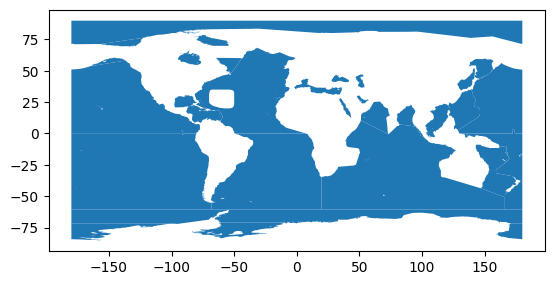

In [ ]:
water_url = "https://naciscdn.org/naturalearth/110m/physical/ne_110m_geography_marine_polys.zip"
water = gpd.read_file(water_url)
water.plot()

### Generating heading and Dist features

In [8]:
def haversine(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).meters

segmented_trajectories_df['Distance_Travelled'] = segmented_trajectories_df.apply(
    lambda row: haversine(row['LAT'], row['LON'],
                          segmented_trajectories_df.loc[row.name - 1, 'LAT'],
                          segmented_trajectories_df.loc[row.name - 1, 'LON']) if row.name > 0 else 0,
    axis=1
)

In [9]:
segmented_trajectories_df.head()

BaseDateTime       LAT       LON  SOG    COG  MMSI  SegmentID  \
0 2022-03-31 00:02:32  27.35372 -94.62546  0.4  228.6   111          0   
1 2022-03-31 00:05:35  27.35372 -94.62550  0.6  219.8   111          0   
2 2022-03-31 00:08:34  27.35377 -94.62556  0.2  221.7   111          0   
3 2022-03-31 00:11:31  27.35380 -94.62557  0.3  105.0   111          0   
4 2022-03-31 00:14:33  27.35365 -94.62542  0.3  173.4   111          0   

   Distance_Travelled  
0            0.000000  
1            3.957698  
2            8.120297  
3            3.468393  
4           22.283088

Conversion:
Meters to Kilometers: Divide by 1,000
Kilometers
=
Meters
/
1000
Kilometers=Meters/1000
Meters to Nautical Miles: Divide by 1,852
Nautical Miles
=
Meters
/
1852
Nautical Miles=Meters/1852

### absolute heading
COG (in degrees)=arctan2(sin(ΔLon)⋅cos(Lat
2
​
 ),cos(Lat
1
​
 )⋅sin(Lat
2
​
 )−sin(Lat
1
​
 )⋅cos(Lat
2
​
 )⋅cos(ΔLon))

In [10]:
def calculate_bearing(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Difference in longitude
    dlon = lon2 - lon1
    # Bearing calculation
    x = np.sin(dlon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(dlon)
    initial_bearing = np.arctan2(x, y)
    # Convert bearing from radians to degrees
    initial_bearing = np.degrees(initial_bearing)
    # Normalize to 0–360°
    return (initial_bearing + 360) % 360

In [11]:
segmented_trajectories_df['COG_Calculated'] = segmented_trajectories_df.apply(
    lambda row: calculate_bearing(
        segmented_trajectories_df.loc[row.name - 1, 'LAT'],
        segmented_trajectories_df.loc[row.name - 1, 'LON'],
        row['LAT'], row['LON']
    ) if row.name > 0 else 0,
    axis=1
)

In [12]:
segmented_trajectories_df.head()

BaseDateTime       LAT       LON  SOG    COG  MMSI  SegmentID  \
0 2022-03-31 00:02:32  27.35372 -94.62546  0.4  228.6   111          0   
1 2022-03-31 00:05:35  27.35372 -94.62550  0.6  219.8   111          0   
2 2022-03-31 00:08:34  27.35377 -94.62556  0.2  221.7   111          0   
3 2022-03-31 00:11:31  27.35380 -94.62557  0.3  105.0   111          0   
4 2022-03-31 00:14:33  27.35365 -94.62542  0.3  173.4   111          0   

   Distance_Travelled  COG_Calculated  
0            0.000000        0.000000  
1            3.957698      270.000009  
2            8.120297      313.174999  
3            3.468393      343.507977  
4           22.283088      138.388906

In [13]:
segmented_trajectories_df.shape

(33190, 9)

In [14]:
segmented_trajectories_df.isna().sum()

BaseDateTime          0
LAT                   0
LON                   0
SOG                   0
COG                   0
MMSI                  0
SegmentID             0
Distance_Travelled    0
COG_Calculated        0
dtype: int64

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Add temporal features
def add_temporal_features(data, time_col):
    data[time_col] = pd.to_datetime(data[time_col])
    data['Hour'] = data[time_col].dt.hour
    data['Minute'] = data[time_col].dt.minute
    data['Second'] = data[time_col].dt.second
    data['TimeDelta'] = data[time_col].diff().dt.total_seconds().fillna(0)
    return data


# Filter segments with insufficient rows
def filter_short_segments(data, window_size, prediction_horizon, group_col='SegmentID'):
    min_required_rows = window_size + prediction_horizon
    filtered_data = data.groupby(group_col).filter(lambda x: len(x) >= min_required_rows)
    print(f"Filtered data contains {len(filtered_data)} rows after removing short segments.")
    return filtered_data


# Prepare sequences with temporal features and SegmentID
def prepare_sequences(data, window_size, prediction_horizon,
                      group_col='SegmentID', time_col='BaseDateTime'):
    sequences = []
    unique_segments = sorted(data[group_col].unique())

    for segment in tqdm(unique_segments, desc="Processing Segments", unit="segment"):
        # print('************',segment)
        segment_data = data[data[group_col] == segment].reset_index(drop=True)
        num_rows = len(segment_data)
        # print(f"Segment {segment} has {num_rows} rows.")

        if num_rows < window_size + prediction_horizon:
            # print(f"Skipping segment {segment}: Not enough rows.")
            continue

        for start in range(num_rows - window_size - prediction_horizon + 1):
            x_window = segment_data.iloc[start:start+window_size]
            y_window = segment_data.iloc[start+window_size:start+window_size+prediction_horizon]
            sequences.append({
                'X': {
                    'LAT': x_window['LAT'].tolist(),
                    'LON': x_window['LON'].tolist(),
                    'SOG': x_window['SOG'].tolist(),
                    'Hour': x_window['Hour'].tolist(),
                    'Minute': x_window['Minute'].tolist(),
                    'Second': x_window['Second'].tolist(),
                    'TimeDelta': x_window['TimeDelta'].tolist(),
                    'SegmentID': x_window['SegmentID'].tolist(),
                    'COG_Calculated': x_window['COG_Calculated'].tolist(),
                    'Distance_Travelled': x_window['Distance_Travelled'].tolist(),

                },
                'Y': {
                    'LAT': y_window['LAT'].tolist(),
                    'LON': y_window['LON'].tolist(),
                    'SOG': y_window['SOG'].tolist(),
                    'Hour': y_window['Hour'].tolist(),
                    'Minute': y_window['Minute'].tolist(),
                    'Second': y_window['Second'].tolist(),
                    'TimeDelta': y_window['TimeDelta'].tolist(),
                    'SegmentID': y_window['SegmentID'].tolist(),
                    'COG_Calculated': y_window['COG_Calculated'].tolist(),
                    'Distance_Travelled': y_window['Distance_Travelled'].tolist(),
                }
            })
    return sequences


# Split data into train/val/test
def split_train_val_test(data, test_size=0.2, val_size=0.2):
    train_data, temp_data = train_test_split(data, test_size=test_size + val_size, random_state=42, shuffle=True)
    val_data, test_data = train_test_split(temp_data, test_size=test_size / (test_size + val_size), random_state=42, shuffle=True)
    return train_data, val_data, test_data

# def split_train_val_test(data, test_size=0.2, val_size=0.2, group_col='SegmentID'):
#     sorted_segments = sorted(data[group_col].unique())  # Sort SegmentIDs
#     train_segments, temp_segments = train_test_split(sorted_segments, test_size=test_size + val_size, random_state=42)
#     val_segments, test_segments = train_test_split(temp_segments, test_size=test_size / (test_size + val_size), random_state=42)

#     train_data = data[data[group_col].isin(train_segments)]
#     val_data = data[data[group_col].isin(val_segments)]
#     test_data = data[data[group_col].isin(test_segments)]

#     return train_data, val_data, test_data

# def split_train_val_test(data, train_size=0.7, val_size=0.1, test_size=0.2, group_col='SegmentID'):
#     train_data = []
#     val_data = []
#     test_data = []

#     unique_segments = sorted(data[group_col].unique())  # Sort SegmentIDs

#     for segment in unique_segments:
#         segment_data = data[data[group_col] == segment]

#         # Split into train and temp (validation + test)
#         train_segment, temp_segment = train_test_split(
#             segment_data, test_size=(val_size + test_size), random_state=42, shuffle=False
#         )

#         # Further split temp_segment into validation and test
#         val_segment, test_segment = train_test_split(
#             temp_segment, test_size=(test_size / (val_size + test_size)), random_state=42, shuffle=False
#         )

#         # Append splits to their respective lists
#         train_data.append(train_segment)
#         val_data.append(val_segment)
#         test_data.append(test_segment)

#     # Concatenate all segments' splits
#     train_data = pd.concat(train_data).reset_index(drop=True)
#     val_data = pd.concat(val_data).reset_index(drop=True)
#     test_data = pd.concat(test_data).reset_index(drop=True)

#     return train_data, val_data, test_data

# Data preparation pipeline without scaling
def prepare_data_pipeline_no_scaling(data, window_size, prediction_horizon,
                                     test_size=0.2, val_size=0.2):
    # Add temporal features
    print("Adding temporal features...")
    data = add_temporal_features(data, 'BaseDateTime')

    # Filter short segments
    print("Filtering short segments...")
    data = filter_short_segments(data, window_size, prediction_horizon)

    # Split data
    print("Splitting data into train, validation, and test sets...")
    train_data, val_data, test_data = split_train_val_test(data, test_size, val_size)

    # Prepare sequences
    print("Preparing training sequences...")
    train_sequences = prepare_sequences(train_data, window_size, prediction_horizon)

    print("Preparing validation sequences...")
    val_sequences = prepare_sequences(val_data, window_size, prediction_horizon)

    print("Preparing test sequences...")
    test_sequences = prepare_sequences(test_data, window_size, prediction_horizon)

    return train_sequences, val_sequences, test_sequences

# Parameters
window_size = 5
prediction_horizon = 2
test_size = 0.2
val_size = 0.32


# Prepare data
train_sequences, val_sequences, test_sequences = prepare_data_pipeline_no_scaling(
    segmented_trajectories_df, window_size, prediction_horizon, test_size, val_size
)

print(f"Number of training sequences: {len(train_sequences)}")
print(f"Number of validation sequences: {len(val_sequences)}")
print(f"Number of test sequences: {len(test_sequences)}")



Adding temporal features...
Filtering short segments...
Filtered data contains 33190 rows after removing short segments.
Splitting data into train, validation, and test sets...
Preparing training sequences...


Processing Segments: 100%|██████████| 3314/3314 [00:02<00:00, 1131.19segment/s]


Preparing validation sequences...


Processing Segments: 100%|██████████| 3241/3241 [00:02<00:00, 1280.58segment/s]


Preparing test sequences...


Processing Segments: 100%|██████████| 2965/2965 [00:02<00:00, 1328.90segment/s]

Number of training sequences: 652
Number of validation sequences: 49
Number of test sequences: 2


In [16]:
def format_sequences(sequences, input_features, output_features, predicted_seq_len):
    """
    Format sequences for Seq2Seq model.

    Parameters:
    - sequences: List of dictionaries with 'X' and 'Y'.
    - input_features: List of feature names for inputs.
    - output_features: List of feature names for outputs.
    - predicted_seq_len: Length of the predicted sequence.

    Returns:
    - encoder_inputs: NumPy array of shape (num_sequences, input_seq_len, num_features).
    - decoder_inputs: NumPy array of shape (num_sequences, output_seq_len, num_features).
    - targets: NumPy array of shape (num_sequences, output_seq_len, num_targets).
    """
    encoder_inputs = []
    decoder_inputs = []
    targets = []

    for seq in sequences:
        encoder_inputs.append(np.array([seq['X'][feature] for feature in input_features]).T)
        y_data = np.array([seq['Y'][feature] for feature in input_features]).T
        decoder_input = np.zeros((predicted_seq_len, len(input_features)))
        decoder_input[:-1, :] = y_data[:-1, :]  # Fill with previous steps
        decoder_inputs.append(decoder_input)
        targets.append(np.array([seq['Y'][feature] for feature in output_features]).T)  # Full predicted sequence

    return (
        np.array(encoder_inputs),
        np.array(decoder_inputs),
        np.array(targets)
    )


# Define the features for input and output
input_features = ['LAT', 'LON', 'Distance_Travelled', 'COG_Calculated', 'Hour', 'Minute', 'Second', 'TimeDelta']
output_features = ['LAT', 'LON', 'COG_Calculated']

predicted_seq_len = 2

# Format sequences for training, validation, and testing
train_enc_inputs, train_dec_inputs, train_targets = format_sequences(train_sequences, input_features, output_features, predicted_seq_len)
val_enc_inputs, val_dec_inputs, val_targets = format_sequences(val_sequences, input_features, output_features, predicted_seq_len)
test_enc_inputs, test_dec_inputs, test_targets = format_sequences(test_sequences, input_features, output_features, predicted_seq_len)

# Print the shapes to verify
print("Training data shapes:")
print(f"Encoder inputs: {train_enc_inputs.shape}, Decoder inputs: {train_dec_inputs.shape}, Targets: {train_targets.shape}")

# Check for NaN or Inf in your data
print("Checking training data for NaN or Inf...")
print(np.isnan(train_enc_inputs).any(), np.isinf(train_enc_inputs).any())
print(np.isnan(train_dec_inputs).any(), np.isinf(train_dec_inputs).any())
print(np.isnan(train_targets).any(), np.isinf(train_targets).any())


Training data shapes:
Encoder inputs: (652, 5, 8), Decoder inputs: (652, 2, 8), Targets: (652, 2, 3)
Checking training data for NaN or Inf...
False False
False False
False False


In [ ]:
from tensorflow.keras.layers import (
    Input, LSTM, Dense, Dropout, BatchNormalization, TimeDistributed, Concatenate, RepeatVector, Lambda
)
from tensorflow.keras.models import Model
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define R2 Score Metric
def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred), axis=-1)
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true, axis=-1, keepdims=True)), axis=-1)
    return 1 - (ss_res / (ss_tot + tf.keras.backend.epsilon()))

# Model Definition
def create_model(observed_seq_len, predicted_seq_len, input_features, output_features, hidden_units=128):
    """
    Create a Seq2Seq model with attention and additional dense layers for time series forecasting.

    Parameters:
    - observed_seq_len: Length of the input sequence.
    - predicted_seq_len: Length of the output sequence.
    - input_features: Number of input features.
    - output_features: Number of output features.
    - hidden_units: Number of LSTM hidden units.

    Returns:
    - model: Compiled Keras model.
    """

    # Encoder
    encoder_inputs = Input(shape=(observed_seq_len, input_features), name="encoder_inputs")
    encoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, name="encoder_lstm")
    encoder_outputs, encoder_state_h, encoder_state_c = encoder_lstm(encoder_inputs)

    # Attention Layer
    attention = tf.keras.layers.Attention(name="attention_layer")
    attention_context = attention([encoder_outputs, encoder_outputs])
    attention_context = Lambda(lambda x: tf.reduce_mean(x, axis=1), name="summarize_attention")(attention_context)
    context_repeated = RepeatVector(predicted_seq_len)(attention_context)

    # Decoder
    decoder_inputs = Input(shape=(predicted_seq_len, input_features), name="decoder_inputs")
    decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, name="decoder_lstm")
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=[encoder_state_h, encoder_state_c])

    # Merge attention context with decoder outputs
    merged_context = Concatenate(axis=-1)([decoder_outputs, context_repeated])

    # Dense Layers for Complexity
    dense_layer_1 = TimeDistributed(Dense(hidden_units * 2, activation="relu"), name="dense_layer_1")(merged_context)
    dense_layer_1 = Dropout(0.4, name="dropout_1")(dense_layer_1)
    dense_layer_1 = BatchNormalization(name="batch_norm_1")(dense_layer_1)

    dense_layer_2 = TimeDistributed(Dense(hidden_units, activation="relu"), name="dense_layer_2")(dense_layer_1)
    dense_layer_2 = Dropout(0.4, name="dropout_2")(dense_layer_2)
    dense_layer_2 = BatchNormalization(name="batch_norm_2")(dense_layer_2)

    dense_layer_3 = TimeDistributed(Dense(hidden_units // 2, activation="relu"), name="dense_layer_3")(dense_layer_2)
    dense_layer_3 = Dropout(0.4, name="dropout_3")(dense_layer_3)
    dense_layer_3 = BatchNormalization(name="batch_norm_3")(dense_layer_3)

    # Final Output Layer
    final_outputs = TimeDistributed(Dense(output_features, activation="linear"), name="final_outputs")(dense_layer_3)

    # Model
    model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=final_outputs, name="adjusted_attention_lstm_model")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae", r2_score])

    return model

# Parameters
observed_seq_len = 5  # Length of the input sequence
predicted_seq_len = 2  # Length of the output sequence
input_features = 8
output_features = 3
batch_size = 32
epochs = 80

# Create the model
model = create_model(
    observed_seq_len=observed_seq_len,
    predicted_seq_len=predicted_seq_len,
    input_features=input_features,
    output_features=output_features
)

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the Model
history = model.fit(
    [train_enc_inputs, train_dec_inputs],
    train_targets,
    validation_data=([val_enc_inputs, val_dec_inputs], val_targets),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[lr_scheduler, early_stopping]
)

# Evaluate the Model
metrics = model.evaluate([test_enc_inputs, test_dec_inputs], test_targets)
test_loss = metrics[0]  # Loss is the first metric
test_mae = metrics[1]   # MAE is the second metric
test_r2 = metrics[2]    # R2 Score is the third metric

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"Test R2 Score: {test_r2}")

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Save the Model
model.save_weights("model_1.weights.h5")
print("Model saved successfully.")





In [ ]:
# Parameters
observed_seq_len = 5  # Length of the input sequence
predicted_seq_len = 2  # Length of the output sequence
input_features = 8
output_features = 3

# Create the model with the necessary parameters
model = create_model(
    observed_seq_len=observed_seq_len,
    predicted_seq_len=predicted_seq_len,
    input_features=input_features,
    output_features=output_features
)

# Now load the model weights
model.load_weights("model_1.weights.h5")



In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from scipy.spatial.distance import euclidean
from math import atan2, degrees

# Function to calculate heading (angle) and distance
def calculate_heading_and_distance(df):
    headings = []
    distances = []
    for i in range(1, len(df)):
        lat1, lon1 = df.iloc[i-1][['LAT', 'LON']]
        lat2, lon2 = df.iloc[i][['LAT', 'LON']]

        # Calculate heading (angle) in degrees
        delta_lon = lon2 - lon1
        delta_lat = lat2 - lat1
        heading = atan2(delta_lat, delta_lon)
        heading = degrees(heading)  # Convert from radians to degrees

        # Calculate distance using Euclidean distance (for simplicity)
        distance = euclidean((lat1, lon1), (lat2, lon2))

        headings.append(heading)
        distances.append(distance)

    # Add NaN for the first row since there's no previous point to calculate heading and distance
    headings.insert(0, np.nan)
    distances.insert(0, np.nan)

    df['Heading'] = headings
    df['Distance'] = distances
    return df

# Preprocess the data for inference
def preprocess_data_inference(df):
    if 'BaseDateTime' not in df.columns:
        raise ValueError("Data must include 'BaseDateTime'")
    df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])
    df['Hour'] = df['BaseDateTime'].dt.hour
    df['Minute'] = df['BaseDateTime'].dt.minute
    df['Second'] = df['BaseDateTime'].dt.second
    df['TimeDelta'] = df['BaseDateTime'].diff().dt.total_seconds().fillna(0)
    df = calculate_heading_and_distance(df)  # Add heading and distance columns
    return df

# Prepare encoder and decoder inputs for inference
def prepare_inputs_inference(data, window_size, input_features):
    encoder_input = data[input_features].iloc[-window_size:].values
    encoder_input = encoder_input.reshape(1, window_size, -1)

    # Prepare decoder input to match the expected sequence length
    decoder_input = np.zeros((1, output_seq_len, len(input_features)))
    decoder_input[0, 0, :] = data[input_features].iloc[-1:].values  # Initialize the first decoder input

    return encoder_input, decoder_input


input_features = ['LAT', 'LON', 'SOG', 'Hour', 'Heading', 'Distance', 'Minute', 'Second', 'TimeDelta']

data = df[:5]
data = preprocess_data_inference(data)
data.fillna(method='bfill', inplace=True)

encoder_input, decoder_input = prepare_inputs_inference(data, observed_seq_len, input_features)

print("Encoder Input Shape:", encoder_input.shape)
print("Decoder Input Shape:", decoder_input.shape)


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from scipy.spatial.distance import euclidean
from math import atan2, degrees
from scipy.signal import savgol_filter

# Function to calculate heading (angle) and distance
def calculate_heading_and_distance(df):
    headings = []
    distances = []
    for i in range(1, len(df)):
        lat1, lon1 = df.iloc[i-1][['LAT', 'LON']]
        lat2, lon2 = df.iloc[i][['LAT', 'LON']]

        # Calculate heading (angle) in degrees
        delta_lon = lon2 - lon1
        delta_lat = lat2 - lat1
        heading = atan2(delta_lat, delta_lon)
        heading = degrees(heading)  # Convert from radians to degrees

        # Calculate distance using Euclidean distance (for simplicity)
        distance = euclidean((lat1, lon1), (lat2, lon2))

        headings.append(heading)
        distances.append(distance)

    # Add NaN for the first row since there's no previous point to calculate heading and distance
    headings.insert(0, np.nan)
    distances.insert(0, np.nan)

    df['Heading'] = headings
    df['Distance'] = distances
    return df

# Preprocess the data for inference
def preprocess_data_inference(df):
    if 'BaseDateTime' not in df.columns:
        raise ValueError("Data must include 'BaseDateTime'")
    df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])
    df['Hour'] = df['BaseDateTime'].dt.hour
    df['Minute'] = df['BaseDateTime'].dt.minute
    df['Second'] = df['BaseDateTime'].dt.second
    df['TimeDelta'] = df['BaseDateTime'].diff().dt.total_seconds().fillna(0)
    df = calculate_heading_and_distance(df)  # Add heading and distance columns
    return df

def predict_future_position_with_heading_distance(
    model, encoder_input, decoder_input, temporal_features,
    velocity_limit=0.50, acceleration_limit=0.50, alpha=0.7, dynamic_alpha=True,
    clip_ranges={"LAT": (-90, 90), "LON": (-180, 180), "SOG": (0, 50)},
    smooth_window=5, poly_order=2, weight_decay=0.9, distance_factor=1.0
):
    predictions = []

    current_encoder_input = encoder_input.copy()
    current_decoder_input = decoder_input.copy()

    # Real-time loop, simulating continuous predictions
    while True:
        output = model.predict([current_encoder_input, current_decoder_input], verbose=0)
        mean = output[..., :len(clip_ranges)]  # Mean predictions (for LAT, LON, SOG)
        std = output[..., len(clip_ranges):]  # Standard deviation for prediction uncertainty
        prediction = mean[:, 0, :]

        # Adjust alpha dynamically if required
        if dynamic_alpha:
            current_alpha = np.clip(1 - np.mean(std), 0.5, 0.9)
        else:
            current_alpha = alpha

        adjusted_prediction = (
            prediction * current_alpha + current_encoder_input[:, -1, :len(clip_ranges)] * (1 - current_alpha)
        )

        # Extract heading and distance from the predictions (assuming it's part of the model's output)
        heading = adjusted_prediction[:, 0]  # Assume heading is in the first column
        distance = adjusted_prediction[:, 2]  # Assume distance (or speed) is in the third column

        # Convert heading to radians if it's in degrees
        heading_rad = np.deg2rad(heading)

        # Calculate the next position based on distance and heading
        current_lat = adjusted_prediction[:, 0]  # Latitude
        current_lon = adjusted_prediction[:, 1]  # Longitude

        # Update position based on heading and distance (kinematic update)
        delta_lat = distance * np.cos(heading_rad) * distance_factor  # Adjust for scale of distance
        delta_lon = distance * np.sin(heading_rad) * distance_factor  # Adjust for scale of distance

        new_lat = current_lat + delta_lat
        new_lon = current_lon + delta_lon

        # Clip the new position to valid ranges
        new_lat = np.clip(new_lat, *clip_ranges["LAT"])
        new_lon = np.clip(new_lon, *clip_ranges["LON"])

        # Store the predicted position (latitude, longitude)
        adjusted_prediction[:, 0] = new_lat
        adjusted_prediction[:, 1] = new_lon

        # Apply velocity and acceleration limits based on the last 5 observations
        if len(predictions) > 0:
            recent_predictions = np.array(predictions[-5:])  # Use the last 5 predictions for weighting
            weighted_predictions = np.mean(recent_predictions, axis=0) * weight_decay + adjusted_prediction * (1 - weight_decay)
            adjusted_prediction = weighted_predictions

            # Calculate velocity and acceleration based on the change in recent observations
            if len(recent_predictions) > 1:
                velocity = adjusted_prediction - recent_predictions[-1]
                velocity = np.clip(velocity, -velocity_limit, velocity_limit)

                acceleration = velocity - (recent_predictions[-1] - recent_predictions[-2])
                acceleration = np.clip(acceleration, -acceleration_limit, acceleration_limit)
                adjusted_prediction = recent_predictions[-1] + acceleration
            else:
                adjusted_prediction = recent_predictions[-1] + velocity

        # Clip predictions to realistic ranges (Latitude, Longitude)
        adjusted_prediction[:, 0] = np.clip(adjusted_prediction[:, 0], *clip_ranges["LAT"])  # Latitude
        adjusted_prediction[:, 1] = np.clip(adjusted_prediction[:, 1], *clip_ranges["LON"])  # Longitude

        predictions.append(adjusted_prediction)

        # Update temporal features for the next prediction
        temporal_features['BaseDateTime'] += pd.Timedelta(seconds=60)
        base_datetime = temporal_features['BaseDateTime'].iloc[0]
        temporal_features['Hour'] = base_datetime.hour
        temporal_features['Minute'] = base_datetime.minute
        temporal_features['Second'] = base_datetime.second
        temporal_features['TimeDelta'] = 60

        # Add temporal features to predictions
        predicted_with_temporal = np.hstack([
            adjusted_prediction,
            temporal_features[['Hour', 'Minute', 'Second', 'TimeDelta']].values
        ])
        predicted_with_temporal = predicted_with_temporal.reshape(1, 1, -1)

        # Update the inputs for the next step (real-time data processing)
        current_decoder_input = np.concatenate([current_decoder_input[:, 1:, :], predicted_with_temporal], axis=1)
        current_encoder_input = np.concatenate([current_encoder_input[:, 1:, :], predicted_with_temporal], axis=1)

        # Optionally smooth the predictions if there are enough steps
        if len(predictions) >= smooth_window:
            smoothed_predictions = savgol_filter(
                np.array(predictions).squeeze(axis=1),
                window_length=min(len(predictions), smooth_window),
                polyorder=poly_order,
                axis=0
            )
        else:
            smoothed_predictions = np.array(predictions).squeeze(axis=1)

        # Return or process the latest prediction here (real-time)
        yield smoothed_predictions[-1]  # This will continuously yield new predictions one-by-one

# Parameters
observed_seq_len = 5  # Length of the input sequence
predicted_seq_len = 2  # Length of the output sequence
steps_to_predict = 5  # Number of steps to predict
input_features = ['LAT', 'LON', 'SOG', 'Hour', 'Heading', 'Distance', 'Minute', 'Second']

# Example DataFrame
df = df[:5]

print('Original DataFrame:')
print(df)

# Preprocess the data
data = preprocess_data_inference(df)
data.fillna(method='bfill', inplace=True)

# Prepare inputs for the model
encoder_input, decoder_input = prepare_inputs_inference(data, observed_seq_len, input_features)

# Load the model weights
# Parameters
observed_seq_len = 5  # Length of the input sequence
predicted_seq_len = 2  # Length of the output sequence
input_features = 8
output_features = 3

# Create the model with the necessary parameters
model = create_model(
    observed_seq_len=observed_seq_len,
    predicted_seq_len=predicted_seq_len,
    input_features=input_features,
    output_features=output_features
)

# Now load the model weights
model.load_weights("model_1.weights.h5")

# Predict future steps
predictions = predict_future_steps_with_robust_constraints(
    model=model,
    encoder_input=encoder_input,
    decoder_input=decoder_input,
    steps=steps_to_predict,
    alpha=0.7,
    dynamic_alpha=True
)

# Print predictions
print("Predicted Future Steps:")
predictions = predictions[:, :3]
print(predictions)


#### Prob model

In [41]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Dropout, Attention, Bidirectional, Add, RepeatVector, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
import numpy as np

def create_advanced_probabilistic_seq2seq(input_seq_len, output_seq_len, input_dim, output_dim, latent_dim):
    """
    Advanced Probabilistic Seq2Seq Model for Time Series Forecasting.

    Parameters:
    - input_seq_len: Length of the input sequences.
    - output_seq_len: Length of the output sequences.
    - input_dim: Number of features in the input data.
    - output_dim: Number of features in the output data.
    - latent_dim: Number of units in the LSTM layers.

    Returns:
    - model: Compiled Keras model.
    """
    # Encoder
    encoder_inputs = Input(shape=(input_seq_len, input_dim), name="encoder_inputs")
    encoder_lstm = Bidirectional(
        LSTM(latent_dim, return_sequences=True, return_state=True), name="bidirectional_encoder"
    )
    encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_lstm(encoder_inputs)

    # Combine forward and backward states
    state_h = Concatenate()([forward_h, backward_h])
    state_c = Concatenate()([forward_c, backward_c])

    # Attention Mechanism
    attention_layer = Attention(name="attention_layer")
    attention_context = attention_layer([encoder_outputs, encoder_outputs])
    attention_context = Lambda(lambda x: tf.reduce_mean(x, axis=1), name="summarize_attention")(attention_context)
    attention_context_repeated = RepeatVector(output_seq_len)(attention_context)

    # Decoder
    decoder_inputs = Input(shape=(output_seq_len, input_dim), name="decoder_inputs")
    shared_lstm = LSTM(latent_dim * 2, return_sequences=True, return_state=True, name="shared_lstm")
    decoder_outputs, _, _ = shared_lstm(decoder_inputs, initial_state=[state_h, state_c])

    # Merge Attention Context with Decoder Outputs
    merged_context = Concatenate(axis=-1)([decoder_outputs, attention_context_repeated])

    # Dropout
    dropout = Dropout(0.3, name="decoder_dropout")(merged_context)

    # Output Layers for Probabilistic Forecasting
    output_mean = Dense(output_dim, activation="linear", kernel_regularizer=tf.keras.regularizers.l2(1e-4),
                        name="mean_output")(dropout)
    output_std = Dense(output_dim, activation="softplus", kernel_regularizer=tf.keras.regularizers.l2(1e-4),
                       name="std_output")(dropout)

    # Combine Outputs
    outputs = Concatenate(name="probabilistic_outputs")([output_mean, output_std])

    # Define the Model
    model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=outputs, name="advanced_probabilistic_seq2seq_model")

    # Custom Loss Function (Negative Log-Likelihood)
    def nll_loss(y_true, y_pred):
        mean = y_pred[..., :output_dim]
        std = y_pred[..., output_dim:]
        dist = tf.compat.v1.distributions.Normal(loc=mean, scale=std)
        return -tf.reduce_mean(dist.log_prob(y_true))

    # Probabilistic Evaluation Metric: CRPS
    def crps_metric(y_true, y_pred):
        mean = y_pred[..., :output_dim]
        std = y_pred[..., output_dim:]
        return tf.reduce_mean((y_true - mean)**2 / (2 * std**2) + tf.math.log(std))

    # R² Metric
    def r2_score(y_true, y_pred):
        mean = y_pred[..., :output_dim]
        ss_res = tf.reduce_sum(tf.square(y_true - mean), axis=-1)
        ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true, axis=-1, keepdims=True)), axis=-1)
        return 1 - (ss_res / (ss_tot + tf.keras.backend.epsilon()))

    # Compile the Model
    optimizer = SGD(learning_rate=0.01, momentum=0.9, clipnorm=1.0)  # Gradient clipping included
    model.compile(optimizer=optimizer, loss=nll_loss, metrics=[crps_metric, r2_score])

    return model


In [42]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Hyperparameters
input_seq_len = 5  # Input sequence length
output_seq_len = 2  # Output sequence length
latent_dim = 64  # Number of LSTM units
input_dim = 8
output_dim = 3

# Create the model
model = create_advanced_probabilistic_seq2seq(input_seq_len, output_seq_len, input_dim, output_dim, latent_dim)

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)

# Train the model
print("Training the model...")
history = model.fit(
    [train_enc_inputs, train_dec_inputs],
    train_targets,
    validation_data=([val_enc_inputs, val_dec_inputs], val_targets),
    batch_size=32,
    epochs=75,
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

# Save the Model
model.save_weights("prob_attention_lstm.weights.h5")
print("Model saved successfully.")


Training the model...
Epoch 1/75
21/21 [==============================] - 5s 64ms/step - loss: 10412.2393 - crps_metric: 10108.8682 - r2_score: -0.0994 - val_loss: 203.2455 - val_crps_metric: 204.3361 - val_r2_score: -0.0674 - lr: 0.0100
Epoch 2/75
21/21 [==============================] - 0s 10ms/step - loss: 75.1489 - crps_metric: 72.7159 - r2_score: 0.0202 - val_loss: 18.8287 - val_crps_metric: 18.1926 - val_r2_score: 0.1044 - lr: 0.0100
Epoch 3/75
21/21 [==============================] - 0s 10ms/step - loss: 11.8764 - crps_metric: 10.8100 - r2_score: 0.2088 - val_loss: 7.6795 - val_crps_metric: 6.8324 - val_r2_score: 0.2741 - lr: 0.0100
Epoch 4/75
21/21 [==============================] - 0s 10ms/step - loss: 6.7718 - crps_metric: 5.8468 - r2_score: 0.3304 - val_loss: 6.0666 - val_crps_metric: 5.1789 - val_r2_score: 0.3481 - lr: 0.0100
Epoch 5/75
21/21 [==============================] - 0s 10ms/step - loss: 5.8917 - crps_metric: 4.9622 - r2_score: 0.3817 - val_loss: 5.6848 - val_crps

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Concatenate, Attention, Dropout, RepeatVector, Lambda
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from scipy.spatial.distance import euclidean
from math import atan2, degrees
from scipy.signal import savgol_filter

# Function to calculate heading (angle) and distance
def calculate_heading_and_distance(df):
    headings = []
    distances = []
    for i in range(1, len(df)):
        lat1, lon1 = df.iloc[i-1][['LAT', 'LON']]
        lat2, lon2 = df.iloc[i][['LAT', 'LON']]

        # Calculate heading (angle) in degrees
        delta_lon = lon2 - lon1
        delta_lat = lat2 - lat1
        heading = atan2(delta_lat, delta_lon)
        heading = degrees(heading)  # Convert from radians to degrees

        # Calculate distance using Euclidean distance (for simplicity)
        distance = euclidean((lat1, lon1), (lat2, lon2))

        headings.append(heading)
        distances.append(distance)

    # Add NaN for the first row since there's no previous point to calculate heading and distance
    headings.insert(0, np.nan)
    distances.insert(0, np.nan)

    df['Heading'] = headings
    df['Distance'] = distances
    return df

# Preprocess the data for inference
def preprocess_data_inference(df):
    if 'BaseDateTime' not in df.columns:
        raise ValueError("Data must include 'BaseDateTime'")
    df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])
    df['Hour'] = df['BaseDateTime'].dt.hour
    df['Minute'] = df['BaseDateTime'].dt.minute
    df['Second'] = df['BaseDateTime'].dt.second
    df['TimeDelta'] = df['BaseDateTime'].diff().dt.total_seconds().fillna(0)
    df = calculate_heading_and_distance(df)  # Add heading and distance columns
    return df

# Prepare encoder and decoder inputs for inference
def prepare_inputs_inference(data, window_size, input_features):
    if len(data) < window_size:
        encoder_input = np.pad(data[input_features].values, ((window_size - len(data), 0), (0, 0)), mode='constant')
    else:
        encoder_input = data[input_features].iloc[-window_size:].values

    encoder_input = encoder_input.reshape(1, window_size, -1)

    decoder_input = np.zeros((1, output_seq_len, len(input_features)))
    decoder_input[0, 0, :] = data[input_features].iloc[-1:].values

    return encoder_input, decoder_input

# Function to adjust predictions based on distance and heading
def adjust_prediction_with_heading_and_distance(prediction, prev_prediction, heading, distance, alpha=0.7):
    # Apply heading and distance as weights
    heading_weight = np.abs(np.cos(np.radians(heading)))  # The closer to zero, the less weight
    distance_weight = distance  # More distance means more weight on the prediction adjustment

    adjusted_prediction = (
        prediction * alpha + prev_prediction * (1 - alpha)
    ) * heading_weight * distance_weight

    return adjusted_prediction

# Prediction Function for Future Steps
def predict_future_steps(model, data, window_size, input_features, output_features, steps, temporal_features, alpha=0.7, velocity_limit=0.5, acceleration_limit=0.5):
    """
    Predict future steps using the trained model.
    """

    predictions = []
    lower_bounds = []
    upper_bounds = []

    # Prepare encoder and decoder inputs
    encoder_input, decoder_input = prepare_inputs_inference(data, window_size, input_features)

    # Predict future steps with drift reduction
    for step in range(steps):
        # Predict using the model
        output = model.predict([encoder_input, decoder_input], verbose=0)

        # Extract mean and std from the output
        mean = output[..., :len(output_features)]
        std = output[..., len(output_features):]

        prediction = mean[:, 0, :]

        # Adjust prediction based on alpha (model confidence) and previous data
        if len(predictions) > 0:
            prev_prediction = predictions[-1]
            lat1, lon1 = prev_prediction[0], prev_prediction[1]
            lat2, lon2 = prediction[0][0], prediction[0][1]

            # Calculate heading and distance based on the previous and predicted positions
            delta_lon = lon2 - lon1
            delta_lat = lat2 - lat1
            heading = atan2(delta_lat, delta_lon)
            heading = degrees(heading)

            distance = euclidean((lat1, lon1), (lat2, lon2))

            # Adjust the prediction using distance and heading
            adjusted_prediction = adjust_prediction_with_heading_and_distance(prediction[0], prev_prediction, heading, distance, alpha)

        else:
            adjusted_prediction = prediction[0]

        # Apply velocity and acceleration limits
        if len(predictions) > 0:
            prev_prediction = predictions[-1]
            velocity = adjusted_prediction - prev_prediction
            velocity = np.clip(velocity, -velocity_limit, velocity_limit)

            if len(predictions) > 1:
                acceleration = velocity - (prev_prediction - predictions[-2])
                acceleration = np.clip(acceleration, -acceleration_limit, acceleration_limit)
                adjusted_prediction = prev_prediction + acceleration
            else:
                adjusted_prediction = prev_prediction + velocity

        # Ensure predictions are within bounds (e.g., [-90, 90] for latitude, [-180, 180] for longitude)
        adjusted_prediction[0] = np.clip(adjusted_prediction[0], -90, 90)  # LAT
        adjusted_prediction[1] = np.clip(adjusted_prediction[1], -180, 180)  # LON

        # Calculate confidence intervals
        lower_bound = adjusted_prediction - 1.96 * std[:, 0, :]
        upper_bound = adjusted_prediction + 1.96 * std[:, 0, :]

        predictions.append(adjusted_prediction)
        lower_bounds.append(lower_bound)
        upper_bounds.append(upper_bound)

        # Update temporal features for the next prediction step
        temporal_features['BaseDateTime'] += pd.Timedelta(seconds=60)  # Assuming predictions are 1 minute apart
        base_datetime = temporal_features['BaseDateTime'].iloc[0]
        temporal_features['Hour'] = base_datetime.hour
        temporal_features['Minute'] = base_datetime.minute
        temporal_features['Second'] = base_datetime.second
        temporal_features['TimeDelta'] = 60

        # Prepare the next decoder and encoder inputs with temporal features
        predicted_with_temporal = np.hstack([
            adjusted_prediction,
            temporal_features[['Hour', 'Minute', 'Second', 'TimeDelta']].values
        ])

        # Ensure that `predicted_with_temporal` matches the expected feature count
        if predicted_with_temporal.shape[1] != encoder_input.shape[2]:
            # Adjust by adding a dummy feature (e.g., setting it to 0) to match the dimensions
            dummy_feature = np.zeros((predicted_with_temporal.shape[0], 1))  # Adding 1 dummy feature
            predicted_with_temporal = np.hstack([predicted_with_temporal, dummy_feature])

        predicted_with_temporal = predicted_with_temporal.reshape(1, 1, -1)

        # Update decoder and encoder inputs for the next step
        decoder_input = np.concatenate([decoder_input[:, 1:, :], predicted_with_temporal], axis=1)
        encoder_input = np.concatenate([encoder_input[:, 1:, :], predicted_with_temporal], axis=1)

    # Smooth predictions using Savitzky-Golay filter
    if len(predictions) >= 5:
        smoothed_predictions = savgol_filter(
            np.array(predictions).squeeze(axis=1),
            window_length=min(len(predictions), 5),
            polyorder=2,
            axis=0
        )
    else:
        smoothed_predictions = np.array(predictions).squeeze(axis=1)

    return smoothed_predictions, lower_bounds, upper_bounds


# Parameters
observed_seq_len = 5  # Length of the input sequence
predicted_seq_len = 2  # Length of the output sequence
steps_to_predict = 5  # Number of steps to predict
input_features = ['LAT', 'LON', 'SOG', 'Hour', 'Heading', 'Distance', 'Minute', 'Second']

# Example DataFrame
df = df[:5]
print('Original DataFrame:')
print(df)

# Preprocess the data
data = preprocess_data_inference(df)
data.fillna(method='bfill', inplace=True)

# Prepare inputs for the model
encoder_input, decoder_input = prepare_inputs_inference(data, observed_seq_len, input_features)

# Load the model weights
model = create_advanced_probabilistic_seq2seq(observed_seq_len, predicted_seq_len, input_dim, output_dim, latent_dim)
model.load_weights("/content/prob_attention_lstm.weights.h5")

# Pass the last row as a DataFrame (using iloc[-1:])
temporal_features = df.iloc[-1:].copy()

# Predict future steps
predictions, lower_bounds, upper_bounds = predict_future_steps(
    model, data=df, window_size=5,
    input_features=['LAT', 'LON', 'SOG', 'Hour', 'Heading', 'Distance', 'Minute', 'Second'],
    output_features=['LAT', 'LON', 'SOG'], steps=10, temporal_features=temporal_features
)

print("Predictions:", predictions)
